# Tugas Oprec Ristek 2021
Debra Mazaya - Ilmu Komputer 2020

In [1]:
import math
import numpy as np
#data cleaning
import pandas as pd
#data visualization
pd.plotting.register_matplotlib_converters()
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#machine learning


#read the training data
train = pd.read_csv('train.csv', dtype='unicode', skipinitialspace=True)

#read the testing data
test = pd.read_csv('test.csv', dtype='unicode')

#read submission data
submission = pd.read_csv('sambleSubmission.csv', low_memory=False)

<h1>Data overview :</h1><br>
id - pengenal unik sebuah baris<br>
patch_version - versi client CSGO<br>
round_status - status dari permainan saat itu<br>
round_status_time_left - Sisa waktu dari permainan saat ini<br>
round_status - status dari permainan saat itu<br>
id - pengenal unik sebuah baris<br>
patch_version - versi client CSGO<br>
round_status - status dari permainan saat itu<br>
round_status_time_left - Sisa waktu dari permainan saat ini<br>
round_status - status dari permainan saat itu<br>
ct_[X]_armor - Berapa sisa armor dari CT ke-X<br>
ct_[X]_has_defuser - Apakah member CT ke-X memiliki defuser<br>
ct_[X]_has_helmet - Apakah member CT ke-X memiliki helmet<br>
ct_[X]_health - Berapa sisa health dari member CT ke-X<br>
ct_[X]_money - Berapa sisa uang dari member T ke-X<br>
ct_[X]_weapons - Daftar senjata yang dipakai member CT ke-X (dipisah dengan ',')<br>
ct_[X]_x - koordinat X dari member CT ke-X<br>
ct_[X]_y - koordinat Y dari member CT ke-X<br>
ct_[X]_z - koordinat Z dari member CT ke-X<br>
t_[X]_armor - Berapa sisa armor dari T ke-X<br>
t_[X]_has_defuser - Apakah member T ke-X memiliki defuser<br>
t_[X]_has_helmet - Apakah member T ke-X memiliki helmet<br>
t_[X]_health - Berapa sisa health dari member T ke-X<br>
t_[X]_money - Berapa sisa uang dari member T ke-X<br>
t_[X]_weapons - Daftar senjata yang dipakai member T ke-X (dipisah dengan ',')<br>
t_[X]_x - koordinat X dari member T ke-X<br>
t_[X]_y - koordinat Y dari member T ke-X<br>
t_[X]_z - koordinat Z dari member T ke-X

In [2]:
#View training data
train

,id,map,patch_version,round_status,round_status_time_left,round_winner,ct_1_armor,ct_1_has_defuser,ct_1_has_helmet,ct_1_health,...,t_4_z,t_5_armor,t_5_has_defuser,t_5_has_helmet,t_5_health,t_5_money,t_5_weapons,t_5_x,t_5_y,t_5_z
0,0,de_train,13754,Normal,94.87900,CT,100,False,False,100,...,-192.07805,94.00000,False,True,100.00000,3050.00000,"Deagle,Awp,Flashbang,MolotovGrenade",-1950.15948,1438.05681,-191.86250
1,1,de_mirage,13738,Normal,74.88580,CT,100,False,True,100,...,-168.08933,100.00000,False,True,100.00000,50.00000,"Glock,Sg553,Flashbang,SmokeGrenade,MolotovGrenade",1215.95440,-114.95292,-164.15431
2,2,de_dust2,13754,FreezeTime,19.89110,CT,0,False,False,100,...,116.66326,0.00000,False,False,100.00000,3300.00000,Glock,-857.42794,-738.39267,122.14158
3,3,de_nuke,13694,Normal,94.88665,CT,100,True,True,100,...,-417.40860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,de_dust2,13754,FreezeTime,4.82829,CT,0,True,False,100,...,108.76220,0.00000,False,False,100.00000,0.00000,"Glock,SmokeGrenade,Flashbang",-980.08787,-754.21419,120.24990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8995,de_mirage,13703,Normal,74.99887,Terrorist,100,False,True,100,...,-167.89125,90.00000,False,True,100.00000,4900.00000,"Ak47,Glock,MolotovGrenade,Flashbang,C4",1295.81597,-352.18709,-168.03226
8996,8996,de_nuke,13732,Normal,35.01643,Terrorist,100,True,False,100,...,-417.42267,90.00000,False,True,58.00000,1200.00000,"Ak47,Glock,SmokeGrenade,MolotovGrenade,Flashba...",-1832.00214,-1159.98692,-415.83755
8997,8997,de_inferno,13703,FreezeTime,20.01283,Terrorist,100,False,True,100,...,-52.03616,100.00000,False,True,100.00000,1100.00000,"Mp9,Glock,HeGrenade,MolotovGrenade,SmokeGrenad...",-1530.91918,544.03639,-63.31054
8998,8998,de_dust2,13754,Normal,114.91360,Terrorist,100,False,False,100,...,83.78672,100.00000,False,True,100.00000,3550.00000,"Ak47,Glock,Flashbang,MolotovGrenade,SmokeGrenade",-492.93046,-808.13780,108.67057


In [3]:
#View test data
test

,id,map,patch_version,round_status,round_status_time_left,ct_1_armor,ct_1_has_defuser,ct_1_has_helmet,ct_1_health,ct_1_money,...,t_4_z,t_5_armor,t_5_has_defuser,t_5_has_helmet,t_5_health,t_5_money,t_5_weapons,t_5_x,t_5_y,t_5_z
0,9000,de_dust2,13749,FreezeTime,11.80141,0,False,False,100,2050,...,116.10155,0.00000,False,False,100.00000,3350.00000,UspS,-331.85785,-754.00524,78.98784
1,9001,de_train,13694,FreezeTime,19.96663,0,False,False,100,800,...,-192.19654,0.00000,False,False,100.00000,800.00000,Glock,-2020.16513,1357.97839,-191.87803
2,9002,de_nuke,13740,FreezeTime,17.61698,0,False,False,100,800,...,-416.85356,100.00000,False,False,100.00000,150.00000,Glock,-1807.97092,-1025.14593,-416.23268
3,9003,de_train,13751,FreezeTime,11.89672,100,True,True,100,7350,...,-192.02085,100.00000,False,True,100.00000,350.00000,"Ak47,Glock,SmokeGrenade,MolotovGrenade,Flashbang",-2083.88237,1216.12822,-191.90021
4,9004,de_train,13753,Normal,54.90399,100,False,False,100,50,...,-191.89411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,14995,de_dust2,13753,Normal,74.88281,100,True,True,100,2050,...,117.24676,100.00000,False,True,100.00000,1250.00000,"Glock,Ak47,MolotovGrenade,SmokeGrenade,Flashbang",-427.94230,-842.93323,95.26875
5996,14996,de_inferno,13703,Normal,75.07208,95,True,True,66,600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,14997,de_dust2,13738,Normal,95.00509,100,False,True,100,0,...,117.04439,96.00000,False,True,100.00000,3750.00000,"Awp,P250,MolotovGrenade,SmokeGrenade,Flashbang,C4",-427.99774,-843.08167,95.12350
5998,14998,de_nuke,13722,Normal,115.12136,94,True,True,100,6250,...,-416.60501,100.00000,False,False,100.00000,2000.00000,"Deagle,MolotovGrenade,SmokeGrenade,Flashbang",-1878.18174,-979.91803,-417.33316


In [4]:
#The example submission dataframe
submission

,id,round_winner
0,9000,CT
1,9001,Terrorist
2,9002,CT
3,9003,Terrorist


# Data Types

In [5]:
train.dtypes

id                        object
map                       object
patch_version             object
round_status              object
round_status_time_left    object
                           ...  
t_5_money                 object
t_5_weapons               object
t_5_x                     object
t_5_y                     object
t_5_z                     object
Length: 96, dtype: object

# View Missing Data

Number of rows, columns n training data: (9000, 96)


<AxesSubplot:>

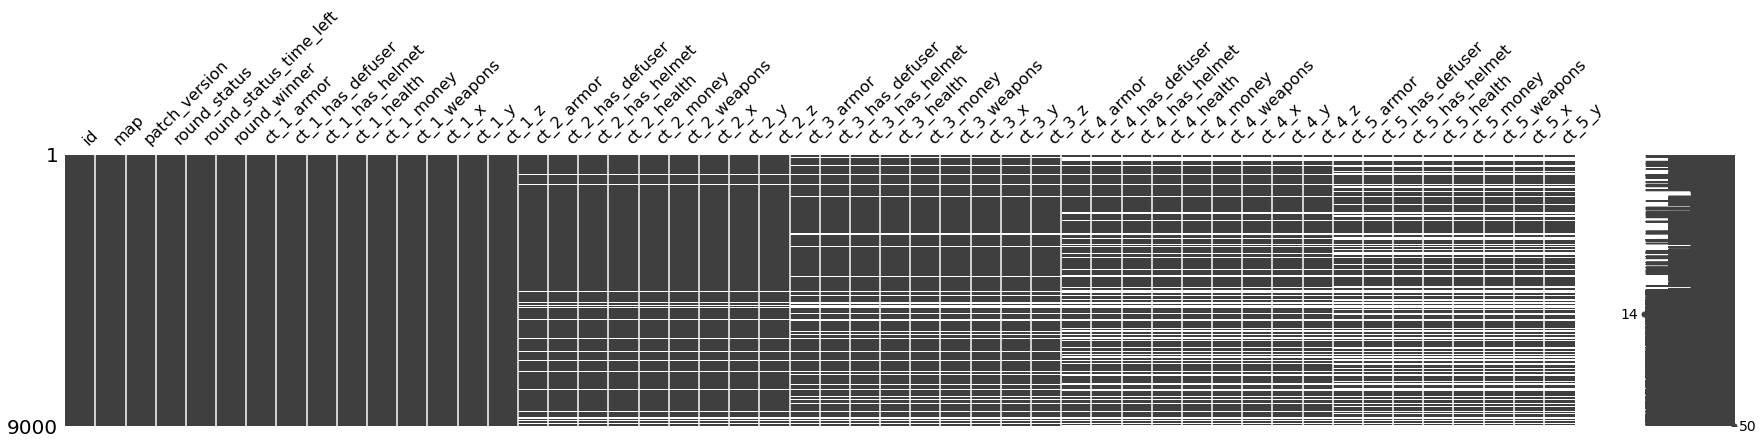

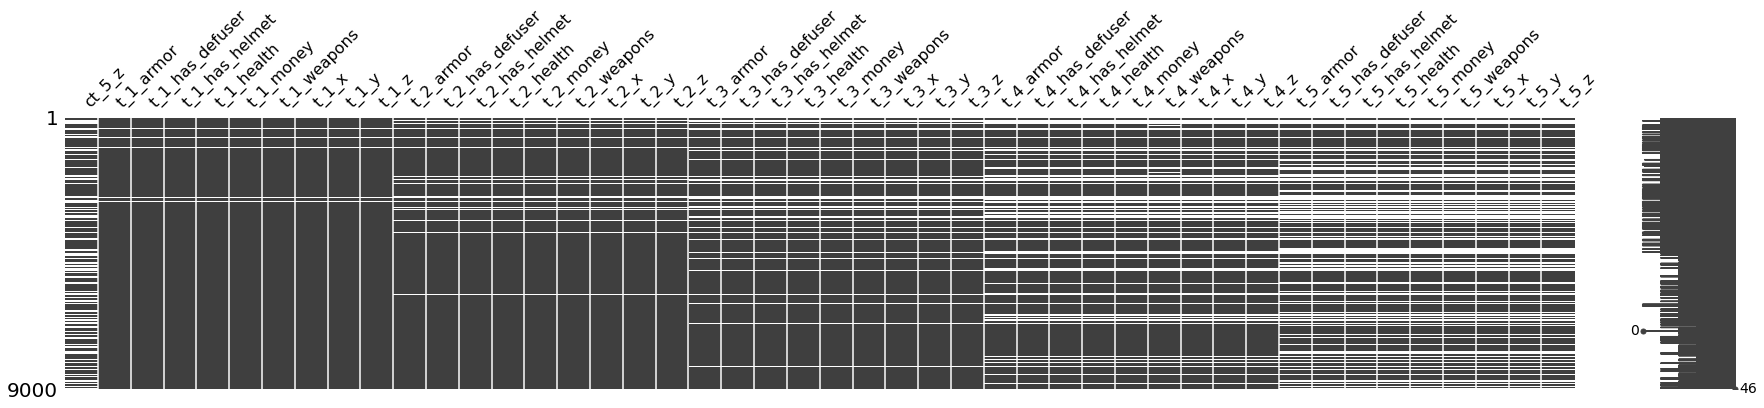

In [6]:
#view missing data using missingno matrix
print(f"Number of rows, columns n training data: {train.shape}")
msno.matrix(train.iloc[:,0:50], figsize=(30,5)) #look at the missing datas from column 0 to 50
msno.matrix(train.iloc[:,50:96], figsize=(30,5)) #look at the missing datas from column 50 to 96

Bisa kita lihat bahwa banyak data dari stats ct5, ct4 dan t5, t4 yang hilang.  

ID sudah pasti akan kita drop, karena dia unique dan hanya mengurutkan.

# Target Variable

winner = CT/Terrorist?

Siapa yang lebih banyak frekuensi kemenangannya?

Text(0, 0.5, 'Team')

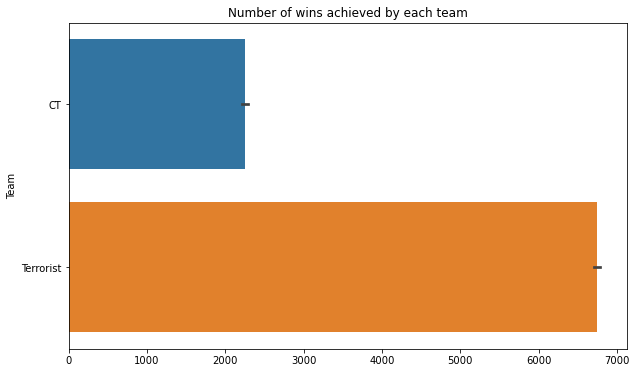

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of wins achieved by each team")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=train.index, y= train['round_winner'])

# Add label for vertical axis
plt.ylabel("Team")

Bisa dilihat bahwa tim terrorist jauh lebih sering menang berdasarkan data kita.

In [8]:
train_data = pd.DataFrame() #Make new dataframe
train_data["round_winner"] = train["round_winner"] #add the target

target_mapping = {"CT" : 0, "Terrorist" : 1}

for c in train_data:
     train_data["round_winner"] = train_data["round_winner"].map(target_mapping)
    
train_data

,round_winner
0,0
1,0
2,0
3,0
4,0
...,...
8995,1
8996,1
8997,1
8998,1


In [9]:
def convertcolumn(dataframe, columns) :
    for column in dataframe[columns] :
        dataframe[column] = dataframe[column].astype(float)#convert to float temporarily
        dataframe[column] = dataframe[column].astype(int)#convert to integer
        dataframe[column] = round(dataframe[column])
        
    return dataframe

# Time left in the round

In [10]:
time_temp = pd.DataFrame()
time_temp[["winner", "round_status_time_left"]] = train[["round_winner", "round_status_time_left"]]

convertcolumn(time_temp, ["round_status_time_left"])

,winner,round_status_time_left
0,CT,94
1,CT,74
2,CT,19
3,CT,94
4,CT,4
...,...,...
8995,Terrorist,74
8996,Terrorist,35
8997,Terrorist,20
8998,Terrorist,114


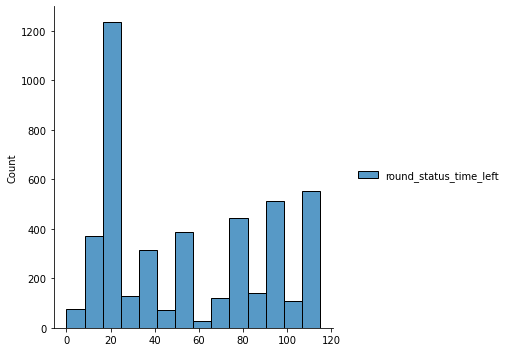

In [11]:
sns.displot(time_temp[time_temp["winner"] == "CT"])


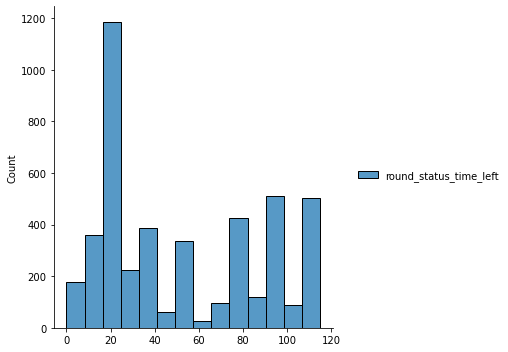

In [12]:
sns.displot(time_temp[time_temp["winner"] == "Terrorist"])

Kesimpulan : kemenangan tidak dipengaruhi oleh berapa waktu sisa dalam permainan

# 1. Armor

### 1.1 CT's Armor

In [13]:
temp_armor = pd.DataFrame() #make temporary dataframe for armor
temp_armor["winner"], temp_armor["ct_1_armor"], temp_armor["ct_2_armor"], temp_armor["ct_3_armor"], temp_armor["ct_4_armor"], temp_armor["ct_5_armor"], temp_armor["t_1_armor"], temp_armor["t_2_armor"], temp_armor["t_3_armor"], temp_armor["t_4_armor"], temp_armor["t_5_armor"] = train["round_winner"], train["ct_1_armor"], train["ct_2_armor"], train["ct_3_armor"], train["ct_4_armor"], train["ct_5_armor"], train["t_1_armor"], train["t_2_armor"], train["t_3_armor"], train["t_4_armor"], train["t_5_armor"]
temp_armor = temp_armor.dropna(how = "any")

for column in temp_armor.iloc[:,1:] :
    temp_armor[column] = temp_armor[column].astype(float)#convert to float temporarily
    temp_armor[column] = temp_armor[column].astype(int)#convert to integer

ct_armor = temp_armor[temp_armor['winner'] == "CT"]
t_armor = temp_armor[temp_armor['winner'] == "Terrorist"]

In [14]:
ct_armor.describe()

,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000
mean,71.843151,72.531583,72.797374,70.706884,73.040099,55.823279,54.573811,55.903478,56.541874,56.814762
std,43.321571,43.123008,43.046521,43.864953,42.894338,48.083320,48.209007,48.075980,47.867731,47.721233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,88.000000,91.000000,91.000000,92.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [15]:
ct_armor = ct_armor.drop("winner", axis=1)
ct_armor["ct_mean"] = ct_armor.iloc[:, 0:4].mean(axis=1)
ct_armor["t_mean"] = ct_armor.iloc[:, 5:9].mean(axis=1)

ct_armor

,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_mean,t_mean
0,100,100,100,100,100,100,100,96,80,94,100.0,94.00
1,100,100,100,100,100,100,0,0,100,100,100.0,50.00
2,0,0,0,0,0,0,0,0,79,0,0.0,19.75
4,0,100,100,100,100,100,0,100,100,0,75.0,75.00
5,0,0,0,100,0,0,0,0,0,0,25.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4490,100,100,0,100,100,100,100,100,100,100,75.0,100.00
4491,100,100,100,100,100,100,100,100,100,100,100.0,100.00
4492,100,100,100,100,100,0,0,0,0,0,100.0,0.00
4493,0,100,100,100,100,100,100,84,100,0,75.0,96.00


In [16]:
ct_armor.describe()

,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_mean,t_mean
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000
mean,71.843151,72.531583,72.797374,70.706884,73.040099,55.823279,54.573811,55.903478,56.541874,56.814762,71.969748,55.710610
std,43.321571,43.123008,43.046521,43.864953,42.894338,48.083320,48.209007,48.075980,47.867731,47.721233,34.355361,41.102344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,88.000000,91.000000,91.000000,92.000000,91.500000,74.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.500000,98.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Karena mean dan standar deviasi dari armor CT dekat, dan banyak dari 

In [17]:
ct_armor.ct_mean.value_counts().head()

100.0    642
0.0      311
75.0     284
50.0     175
25.0     122
Name: ct_mean, dtype: int64

In [18]:
ct_armor.t_mean.value_counts().head()

0.0      787
100.0    519
75.0     240
50.0     215
25.0     161
Name: t_mean, dtype: int64

dapat disimpulkan jika jumlah armor CT > armor Terrorist, ia cenderung menang

### 1.2 Terrorist's Armor

In [19]:
t_armor = t_armor.drop("winner", axis=1)
t_armor["ct_mean"] = t_armor.iloc[:, 0:4].mean(axis=1)
t_armor["t_mean"] = t_armor.iloc[:, 5:9].mean(axis=1)

t_armor

,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_mean,t_mean
4497,0,100,100,100,0,0,0,0,100,100,75.00,25.00
4499,100,100,100,86,100,100,100,100,100,100,96.50,100.00
4503,100,100,91,100,100,100,100,100,100,100,97.75,100.00
4504,0,100,0,0,0,0,100,0,100,100,25.00,50.00
4506,0,0,84,0,86,0,100,100,95,97,21.00,73.75
...,...,...,...,...,...,...,...,...,...,...,...,...
8992,0,0,0,0,0,0,0,0,0,0,0.00,0.00
8993,0,0,0,0,0,0,79,0,0,0,0.00,19.75
8996,100,100,100,97,98,99,90,100,100,90,99.25,97.25
8997,100,100,0,0,0,74,100,90,100,100,50.00,91.00


In [20]:
ct_armor.ct_mean.value_counts().head()

100.0    642
0.0      311
75.0     284
50.0     175
25.0     122
Name: ct_mean, dtype: int64

In [21]:
ct_armor.t_mean.value_counts().head()

0.0      787
100.0    519
75.0     240
50.0     215
25.0     161
Name: t_mean, dtype: int64

In [22]:
t_armor.t_mean.value_counts().head()

100.0    461
0.0      388
50.0     171
75.0     151
25.0     106
Name: t_mean, dtype: int64

In [23]:
t_armor.ct_mean.value_counts().tail()

64.00    1
21.50    1
84.75    1
69.00    1
67.75    1
Name: ct_mean, dtype: int64

Hal yang tadi kita simpulkan saat menganalisa data tim CT bisa kita simpulkan juga dengan tim terrorist.

In [24]:
ct_armor.describe()

,ct_1_armor,ct_2_armor,ct_3_armor,ct_4_armor,ct_5_armor,t_1_armor,t_2_armor,t_3_armor,t_4_armor,t_5_armor,ct_mean,t_mean
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000
mean,71.843151,72.531583,72.797374,70.706884,73.040099,55.823279,54.573811,55.903478,56.541874,56.814762,71.969748,55.710610
std,43.321571,43.123008,43.046521,43.864953,42.894338,48.083320,48.209007,48.075980,47.867731,47.721233,34.355361,41.102344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,88.000000,91.000000,91.000000,92.000000,91.500000,74.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.500000,98.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [25]:
print(f"%missing value di kolom ct 1 {train.ct_1_armor.isnull().sum()/train.ct_1_armor.notnull().sum()}\n%missing value di kolom ct 2 {train.ct_2_armor.isnull().sum()/train.ct_2_armor.notnull().sum()}\n% missing value di kolom ct 3 {train.ct_3_armor.isnull().sum()/train.ct_3_armor.notnull().sum()}, \n%missing value di kolom ct 4 {train.ct_4_armor.isnull().sum()/train.ct_4_armor.notnull().sum()}, \n%missing value di kolom ct 5 {train.ct_5_armor.isnull().sum()/train.ct_5_armor.notnull().sum()}")

%missing value di kolom ct 1 0.0
%missing value di kolom ct 2 0.05869897659098929
% missing value di kolom ct 3 0.14010640993159362, 
%missing value di kolom ct 4 0.2619181155356141, 
%missing value di kolom ct 5 0.48760330578512395


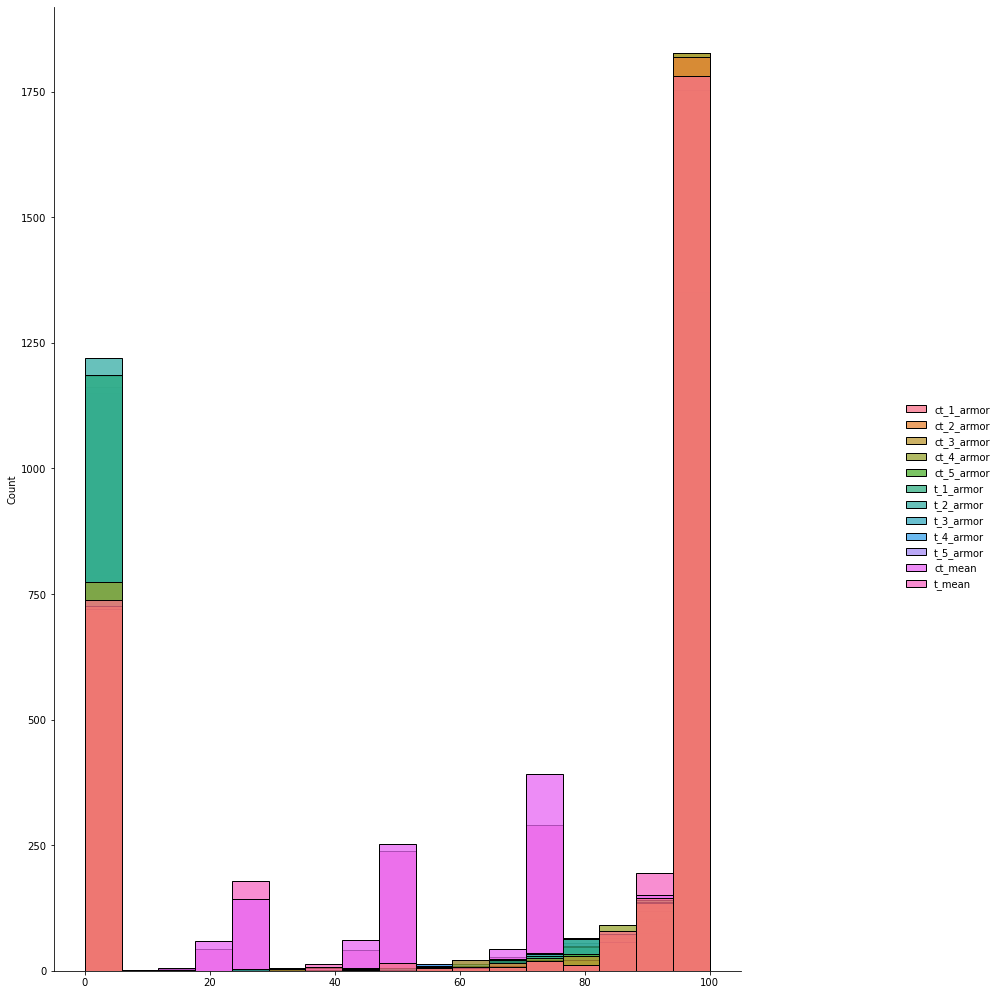

In [26]:
ctarmorgr = sns.displot(ct_armor)
ctarmorgr.fig.set_size_inches(15,15)

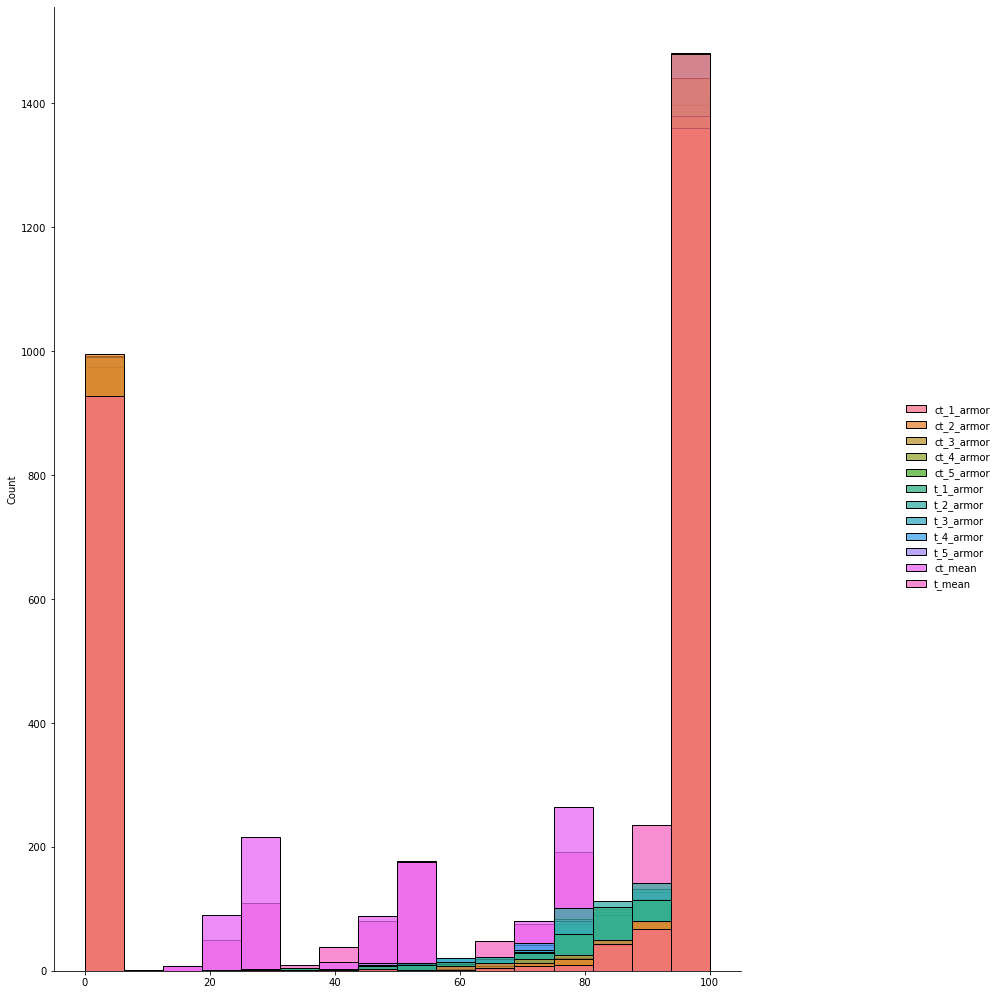

In [27]:
tarmorgr = sns.displot(t_armor)
tarmorgr.fig.set_size_inches(15,15)

In [28]:
ct_armor_cols = ["ct_1_armor", "ct_2_armor"]
t_armor_cols = ["t_1_armor", "t_2_armor"]

train_data[ct_armor_cols] = train[ct_armor_cols]
train_data[t_armor_cols] = train[t_armor_cols]
train_data[ct_armor_cols] = train_data[ct_armor_cols].fillna(100)
train_data[t_armor_cols] = train_data[t_armor_cols].fillna(100)

convertcolumn(train_data, ct_armor_cols)
convertcolumn(train_data, t_armor_cols)

train_data["ct_armor"] = train_data[ct_armor_cols].mean(axis = 1)
train_data["t_armor"] = train_data[t_armor_cols].mean(axis = 1)

train_data = train_data.drop((ct_armor_cols + t_armor_cols), axis=1)

train_data

,round_winner,ct_armor,t_armor
0,0,100.0,100.0
1,0,100.0,50.0
2,0,0.0,0.0
3,0,100.0,96.5
4,0,50.0,50.0
...,...,...,...
8995,1,50.0,89.0
8996,1,100.0,94.5
8997,1,100.0,87.0
8998,1,100.0,99.0


In [29]:
print(f"%missing value di kolom t 1 {train.t_1_armor.isnull().sum()/train.t_1_armor.notnull().sum()}\n%missing value di kolom ct 2 {train.t_2_armor.isnull().sum()/train.t_2_armor.notnull().sum()}\n% missing value di kolom ct 3 {train.t_3_armor.isnull().sum()/train.t_3_armor.notnull().sum()}, \n%missing value di kolom ct 4 {train.t_4_armor.isnull().sum()/train.t_4_armor.notnull().sum()}, \n%missing value di kolom ct 5 {train.t_5_armor.isnull().sum()/train.t_5_armor.notnull().sum()}")

%missing value di kolom t 1 0.011235955056179775
%missing value di kolom ct 2 0.05894811154253442
% missing value di kolom ct 3 0.12640801001251564, 
%missing value di kolom ct 4 0.24722838137472283, 
%missing value di kolom ct 5 0.4878492312778972


In [30]:
test

,id,map,patch_version,round_status,round_status_time_left,ct_1_armor,ct_1_has_defuser,ct_1_has_helmet,ct_1_health,ct_1_money,...,t_4_z,t_5_armor,t_5_has_defuser,t_5_has_helmet,t_5_health,t_5_money,t_5_weapons,t_5_x,t_5_y,t_5_z
0,9000,de_dust2,13749,FreezeTime,11.80141,0,False,False,100,2050,...,116.10155,0.00000,False,False,100.00000,3350.00000,UspS,-331.85785,-754.00524,78.98784
1,9001,de_train,13694,FreezeTime,19.96663,0,False,False,100,800,...,-192.19654,0.00000,False,False,100.00000,800.00000,Glock,-2020.16513,1357.97839,-191.87803
2,9002,de_nuke,13740,FreezeTime,17.61698,0,False,False,100,800,...,-416.85356,100.00000,False,False,100.00000,150.00000,Glock,-1807.97092,-1025.14593,-416.23268
3,9003,de_train,13751,FreezeTime,11.89672,100,True,True,100,7350,...,-192.02085,100.00000,False,True,100.00000,350.00000,"Ak47,Glock,SmokeGrenade,MolotovGrenade,Flashbang",-2083.88237,1216.12822,-191.90021
4,9004,de_train,13753,Normal,54.90399,100,False,False,100,50,...,-191.89411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,14995,de_dust2,13753,Normal,74.88281,100,True,True,100,2050,...,117.24676,100.00000,False,True,100.00000,1250.00000,"Glock,Ak47,MolotovGrenade,SmokeGrenade,Flashbang",-427.94230,-842.93323,95.26875
5996,14996,de_inferno,13703,Normal,75.07208,95,True,True,66,600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,14997,de_dust2,13738,Normal,95.00509,100,False,True,100,0,...,117.04439,96.00000,False,True,100.00000,3750.00000,"Awp,P250,MolotovGrenade,SmokeGrenade,Flashbang,C4",-427.99774,-843.08167,95.12350
5998,14998,de_nuke,13722,Normal,115.12136,94,True,True,100,6250,...,-416.60501,100.00000,False,False,100.00000,2000.00000,"Deagle,MolotovGrenade,SmokeGrenade,Flashbang",-1878.18174,-979.91803,-417.33316


In [31]:
test = test.drop(["ct_3_armor", "ct_4_armor", "ct_5_armor", "t_3_armor", "t_4_armor", "t_5_armor"], axis=1)

test[ct_armor_cols] = test[ct_armor_cols].fillna(100)
test[t_armor_cols] = test[t_armor_cols].fillna(100)

convertcolumn(test, ct_armor_cols)
convertcolumn(test, t_armor_cols)

test["ct_armor"] = test[ct_armor_cols].mean(axis = 1)
test["t_armor"] = test[t_armor_cols].mean(axis = 1)

test["ct_armor"] = test["ct_armor"].fillna(100)
test["t_armor"] = test["t_armor"].fillna(100)

convertcolumn(test, ["ct_1_armor", "ct_2_armor", "t_1_armor", "t_2_armor"])

test["ct_armor"] = test[["ct_1_armor", "ct_2_armor"]].mean(axis = 1)
test["t_armor"] = test[["t_1_armor", "t_2_armor"]].mean(axis = 1)

test = test.drop(['ct_1_armor', 'ct_2_armor', 't_1_armor', 't_2_armor'], axis=1)

test

,id,map,patch_version,round_status,round_status_time_left,ct_1_has_defuser,ct_1_has_helmet,ct_1_health,ct_1_money,ct_1_weapons,...,t_5_has_defuser,t_5_has_helmet,t_5_health,t_5_money,t_5_weapons,t_5_x,t_5_y,t_5_z,ct_armor,t_armor
0,9000,de_dust2,13749,FreezeTime,11.80141,False,False,100,2050,UspS,...,False,False,100.00000,3350.00000,UspS,-331.85785,-754.00524,78.98784,0.0,49.5
1,9001,de_train,13694,FreezeTime,19.96663,False,False,100,800,UspS,...,False,False,100.00000,800.00000,Glock,-2020.16513,1357.97839,-191.87803,0.0,0.0
2,9002,de_nuke,13740,FreezeTime,17.61698,False,False,100,800,P2000,...,False,False,100.00000,150.00000,Glock,-1807.97092,-1025.14593,-416.23268,0.0,50.0
3,9003,de_train,13751,FreezeTime,11.89672,True,True,100,7350,"Ak47,P250,HeGrenade,Flashbang,IncendiaryGrenad...",...,False,True,100.00000,350.00000,"Ak47,Glock,SmokeGrenade,MolotovGrenade,Flashbang",-2083.88237,1216.12822,-191.90021,100.0,94.5
4,9004,de_train,13753,Normal,54.90399,False,False,100,50,"ZeusX27,M4a4,UspS,HeGrenade",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,85.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,14995,de_dust2,13753,Normal,74.88281,True,True,100,2050,"Ak47,UspS,HeGrenade,Flashbang",...,False,True,100.00000,1250.00000,"Glock,Ak47,MolotovGrenade,SmokeGrenade,Flashbang",-427.94230,-842.93323,95.26875,85.5,100.0
5996,14996,de_inferno,13703,Normal,75.07208,True,True,66,600,"Aug,UspS,SmokeGrenade,HeGrenade,Flashbang",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,79.5
5997,14997,de_dust2,13738,Normal,95.00509,False,True,100,0,"Deagle,Famas,HeGrenade",...,False,True,100.00000,3750.00000,"Awp,P250,MolotovGrenade,SmokeGrenade,Flashbang,C4",-427.99774,-843.08167,95.12350,100.0,100.0
5998,14998,de_nuke,13722,Normal,115.12136,True,True,100,6250,"M4a4,UspS,SmokeGrenade,Flashbang,IncendiaryGre...",...,False,False,100.00000,2000.00000,"Deagle,MolotovGrenade,SmokeGrenade,Flashbang",-1878.18174,-979.91803,-417.33316,97.0,100.0


# Defuser Comparison

In [32]:
defuser_cols = ["ct_1_has_defuser", "ct_2_has_defuser", "ct_3_has_defuser", "ct_4_has_defuser", "ct_5_has_defuser", "t_1_has_defuser", "t_2_has_defuser", "t_3_has_defuser", "t_4_has_defuser", "t_5_has_defuser"]
defuser_temp = pd.DataFrame()

defuser_temp[defuser_cols] = train[defuser_cols]
defuser_temp[defuser_cols] = defuser_temp[defuser_cols].dropna(how="any")

print("NaN/total")
for i in defuser_cols :
    print(f"{i} : {train[i].isna().sum()/train[i].notna().sum()}")
    
defuser_temp["winner"] = train["round_winner"]
defuser_temp = defuser_temp.replace(["True", "False"], [1, 0])

defuser_ct = defuser_temp[train["round_winner"] == "CT"]
defuser_t = defuser_temp[train["round_winner"] == "Terrorist"]
defuser_ct = defuser_ct.drop("winner", axis=1)
defuser_t = defuser_t.drop("winner", axis=1)

NaN/total
ct_1_has_defuser : 0.0
ct_2_has_defuser : 0.05869897659098929
ct_3_has_defuser : 0.14010640993159362
ct_4_has_defuser : 0.2619181155356141
ct_5_has_defuser : 0.48760330578512395
t_1_has_defuser : 0.011235955056179775
t_2_has_defuser : 0.05894811154253442
t_3_has_defuser : 0.12640801001251564
t_4_has_defuser : 0.24722838137472283
t_5_has_defuser : 0.4878492312778972


Kita bisa mengabaikan ct_4_has_defuser, ct_5_has_defuser, t_3_has_defuser, t_4_has_defuse, dan t_5_defuse jika data dari mereka ternyata tidak terlalu relevan terhadap target kita

## 2.1 Stats defuser saat CT menang

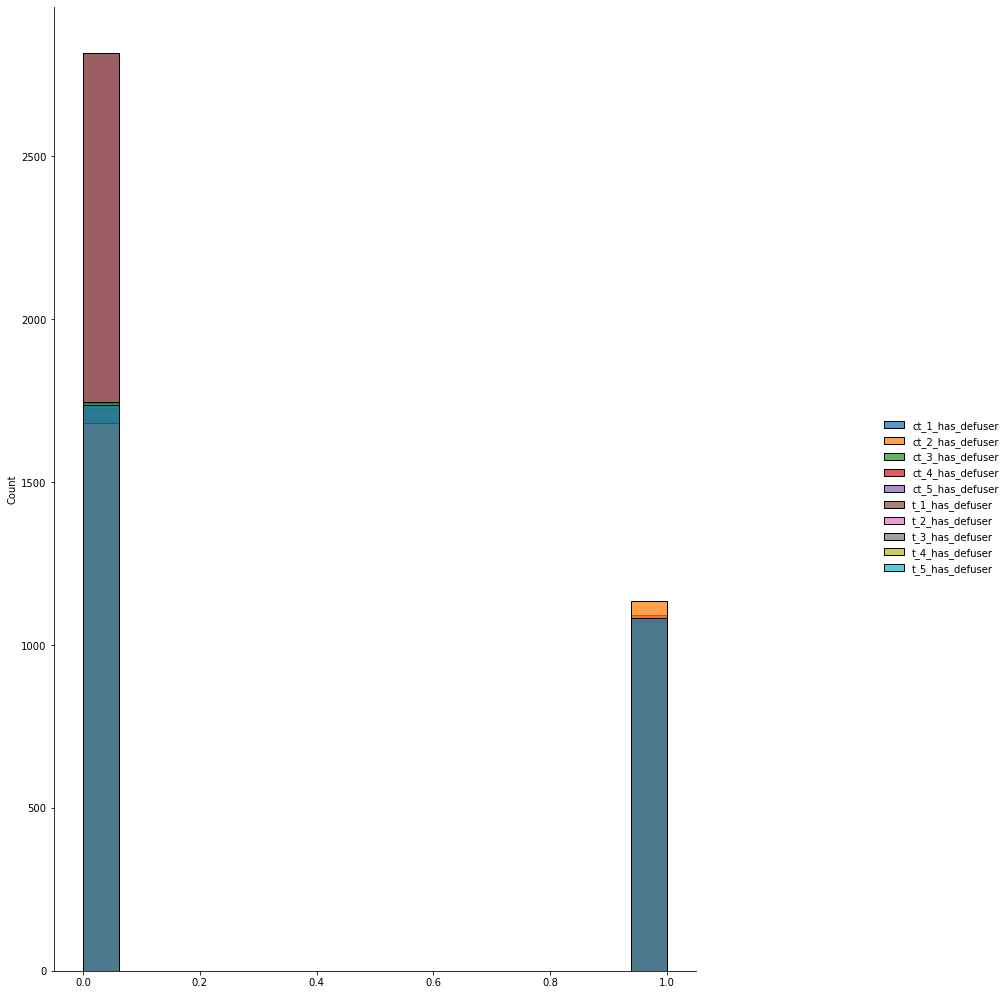

In [33]:
ctdef = sns.displot(defuser_ct)
ctdef.fig.set_size_inches(15,15)

## 2.2 Stats defuser saat Terrorist menang

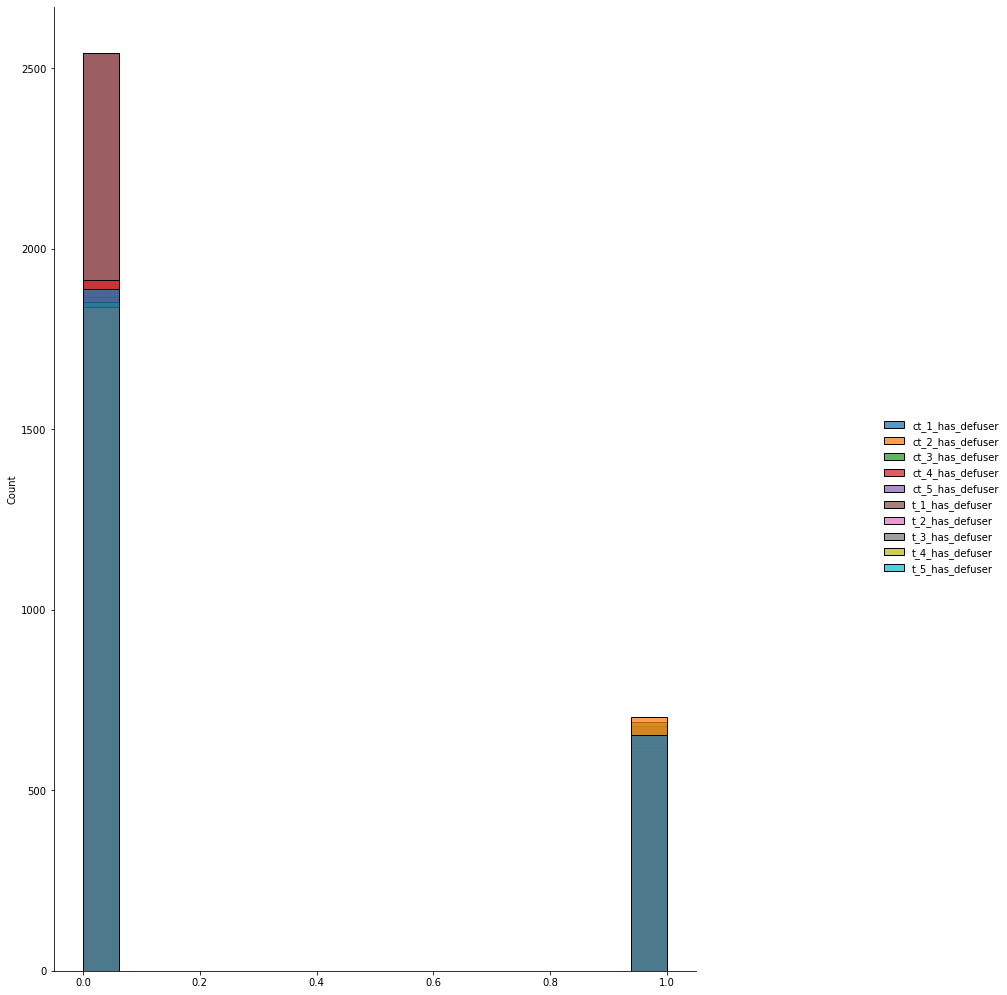

In [34]:
tdef = sns.displot(defuser_t)
tdef.fig.set_size_inches(15,15)

ct_4_has_defuser terlihat memiliki perbedaan

In [35]:
train["ct_4_has_defuser"].describe()

count      7132
unique        2
top       False
freq       4610
Name: ct_4_has_defuser, dtype: object

In [36]:
train_data["ct_4_has_defuser"] = train["ct_4_has_defuser"]

In [37]:
train_data["ct_4_has_defuser"] = train_data["ct_4_has_defuser"].fillna(1)
train_data["ct_4_has_defuser"] = train_data["ct_4_has_defuser"].map({"True" : 1, "False" : 0})

test["ct_4_has_defuser"] = test["ct_4_has_defuser"].fillna(1)
test['ct_4_has_defuser'] = test['ct_4_has_defuser'].astype(str)
test["ct_4_has_defuser"] = test["ct_4_has_defuser"].map({"True" : 1, "False" : 0})


# Has Helmet Comparison

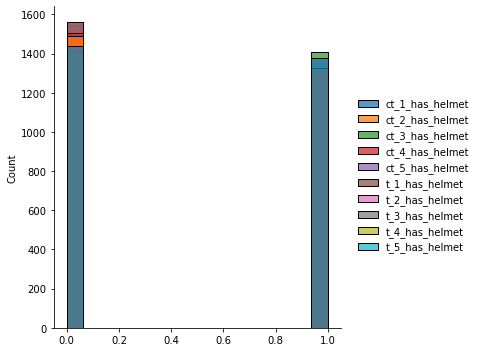

In [38]:
helmet_temp = pd.DataFrame() #New dataframe to temporarily store helmets

helmet_cols = ["round_winner", "ct_1_has_helmet", "ct_2_has_helmet", "ct_3_has_helmet", "ct_4_has_helmet", "ct_5_has_helmet", "t_1_has_helmet", "t_2_has_helmet", "t_3_has_helmet", "t_4_has_helmet", "t_5_has_helmet"]

helmet_temp[helmet_cols] = train[helmet_cols]

helmet_temp = helmet_temp.replace(["True" ,"False"], [1, 0])

helmet_temp = helmet_temp.dropna(how = "any")

sns.displot(helmet_temp[helmet_temp["round_winner"] == "CT"]);

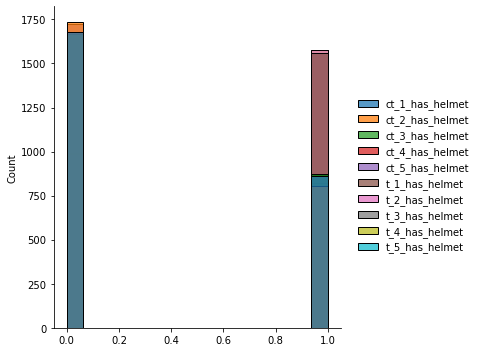

In [39]:
sns.displot(helmet_temp[helmet_temp["round_winner"] == "Terrorist"]);

t_1 mempunyai peran signifikan dalam menentukan pemenang. Terrorist cenderung menang jika t_1 punya helmet. ct_3_has_helmet jg terlihat beda bisa dilihat di perbandingan grafik di atas

In [40]:
train.t_1_has_helmet.notnull().sum()

8900

In [41]:
train_data["t_1_has_helmet"] = train["t_1_has_helmet"].fillna(1)
train_data["t_1_has_helmet"] = train_data["t_1_has_helmet"].replace(["True", "False"], [1,0])
test["t_1_has_helmet"] = test["t_1_has_helmet"].fillna(1)
test["t_1_has_helmet"] = test["t_1_has_helmet"].replace(["True", "False"], [1,0])

In [42]:
train_data["ct_3_has_helmet"] = train["ct_3_has_helmet"].fillna(1)
train_data["ct_3_has_helmet"] = train_data["ct_3_has_helmet"].replace(["True", "False"], [1,0])
test["ct_3_has_helmet"] = test["ct_3_has_helmet"].fillna(test["ct_3_has_helmet"].mode())
test["ct_3_has_helmet"] = test["ct_3_has_helmet"].replace(["True", "False"], [1,0])

In [43]:
train_data["ct_4_has_helmet"] = train["ct_4_has_helmet"].fillna(1)
train_data["ct_4_has_helmet"] = train_data["ct_4_has_helmet"].replace(["True", "False"], [1,0])
test["ct_4_has_helmet"] = test["ct_4_has_helmet"].fillna(test["ct_4_has_helmet"].mode())
test["ct_4_has_helmet"] = test["ct_4_has_helmet"].replace(["True", "False"], [1,0])

In [44]:
train_data["t_2_has_helmet"] = train["t_2_has_helmet"].fillna(1)
train_data["t_2_has_helmet"] = train_data["t_2_has_helmet"].replace(["True", "False"], [1,0])
test["t_2_has_helmet"] = test["t_2_has_helmet"].fillna(test["t_2_has_helmet"].mode())
test["t_2_has_helmet"] = test["t_2_has_helmet"].replace(["True", "False"], [1,0])

# Health Comparison

In [45]:
healthcols = ["ct_1_health", "ct_2_health", "ct_3_health", "ct_4_health", "ct_5_health", "t_1_health", "t_2_health", "t_3_health", "t_4_health", "t_5_health"]

temp_health = pd.DataFrame()

temp_health["winner"] = train["round_winner"]
temp_health[healthcols] = train[healthcols]
temp_health = temp_health.dropna(how = "any")

convertcolumn(temp_health, healthcols)

temp_health

,winner,ct_1_health,ct_2_health,ct_3_health,ct_4_health,ct_5_health,t_1_health,t_2_health,t_3_health,t_4_health,t_5_health
0,CT,100,100,100,100,100,100,100,100,100,100
1,CT,100,100,100,100,100,94,100,100,100,100
2,CT,100,100,100,100,100,100,100,100,100,100
4,CT,100,100,100,100,100,100,100,100,100,100
5,CT,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...
8992,Terrorist,100,100,100,100,100,100,100,100,100,100
8993,Terrorist,100,100,100,100,100,100,100,100,100,100
8996,Terrorist,100,100,100,83,97,82,100,100,100,58
8997,Terrorist,100,100,100,100,100,100,100,100,100,100


In [46]:
print("NaN/total")
for i in healthcols :
    print(f"{i} : {train[i].isna().sum()/train[i].notna().sum()}")

NaN/total
ct_1_health : 0.0
ct_2_health : 0.05869897659098929
ct_3_health : 0.14010640993159362
ct_4_health : 0.2619181155356141
ct_5_health : 0.48760330578512395
t_1_health : 0.011235955056179775
t_2_health : 0.05894811154253442
t_3_health : 0.12640801001251564
t_4_health : 0.24722838137472283
t_5_health : 0.4878492312778972


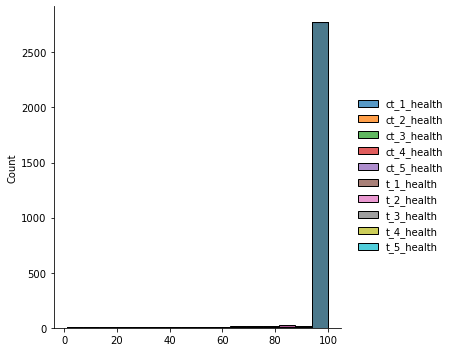

In [47]:
sns.displot(temp_health[temp_health["winner"] == "CT"])

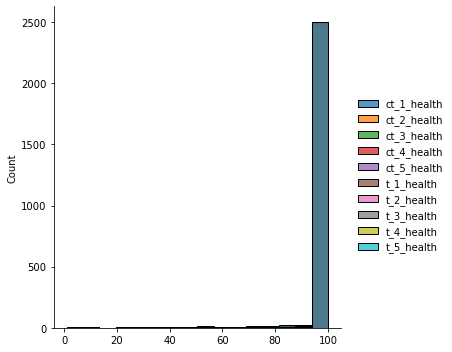

In [48]:
sns.displot(temp_health[temp_health["winner"] == "Terrorist"])

Tidak ada perbedaan signifikan diantara health dan penentuan siapa yang menang.

In [49]:
test = test.drop(healthcols, axis=1)

# Money Comparison

In [50]:
moneycols = ["ct_1_money", "ct_2_money", "ct_3_money", "ct_4_money", "ct_5_money", "t_1_money", "t_2_money", "t_3_money", "t_4_money", "t_5_money"]

money_temp = pd.DataFrame()
money_temp[moneycols] = train[moneycols]
money_temp["winner"] = train["round_winner"]
money_temp = money_temp.dropna(how="any")

money_temp

,ct_1_money,ct_2_money,ct_3_money,ct_4_money,ct_5_money,t_1_money,t_2_money,t_3_money,t_4_money,t_5_money,winner
0,0,50.00000,0.00000,0.00000,50.00000,1350.00000,1700.00000,350.00000,3000.00000,3050.00000,CT
1,150,0.00000,300.00000,250.00000,100.00000,0.00000,150.00000,0.00000,150.00000,50.00000,CT
2,1400,2650.00000,1500.00000,1700.00000,1700.00000,3550.00000,5100.00000,3250.00000,3550.00000,3300.00000,CT
4,0,150.00000,150.00000,150.00000,150.00000,150.00000,0.00000,150.00000,150.00000,0.00000,CT
5,100,800.00000,0.00000,150.00000,0.00000,800.00000,800.00000,800.00000,800.00000,800.00000,CT
...,...,...,...,...,...,...,...,...,...,...,...
8992,800,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000,800.00000,Terrorist
8993,2650,2300.00000,2350.00000,2050.00000,2050.00000,3400.00000,4600.00000,3700.00000,3400.00000,3700.00000,Terrorist
8996,700,250.00000,100.00000,1500.00000,900.00000,50.00000,800.00000,1200.00000,300.00000,1200.00000,Terrorist
8997,100,0.00000,1600.00000,1400.00000,1800.00000,3400.00000,2750.00000,0.00000,1300.00000,1100.00000,Terrorist


In [51]:
convertcolumn(money_temp, moneycols)

,ct_1_money,ct_2_money,ct_3_money,ct_4_money,ct_5_money,t_1_money,t_2_money,t_3_money,t_4_money,t_5_money,winner
0,0,50,0,0,50,1350,1700,350,3000,3050,CT
1,150,0,300,250,100,0,150,0,150,50,CT
2,1400,2650,1500,1700,1700,3550,5100,3250,3550,3300,CT
4,0,150,150,150,150,150,0,150,150,0,CT
5,100,800,0,150,0,800,800,800,800,800,CT
...,...,...,...,...,...,...,...,...,...,...,...
8992,800,800,800,800,800,800,800,800,800,800,Terrorist
8993,2650,2300,2350,2050,2050,3400,4600,3700,3400,3700,Terrorist
8996,700,250,100,1500,900,50,800,1200,300,1200,Terrorist
8997,100,0,1600,1400,1800,3400,2750,0,1300,1100,Terrorist


<Figure size 2160x720 with 0 Axes>

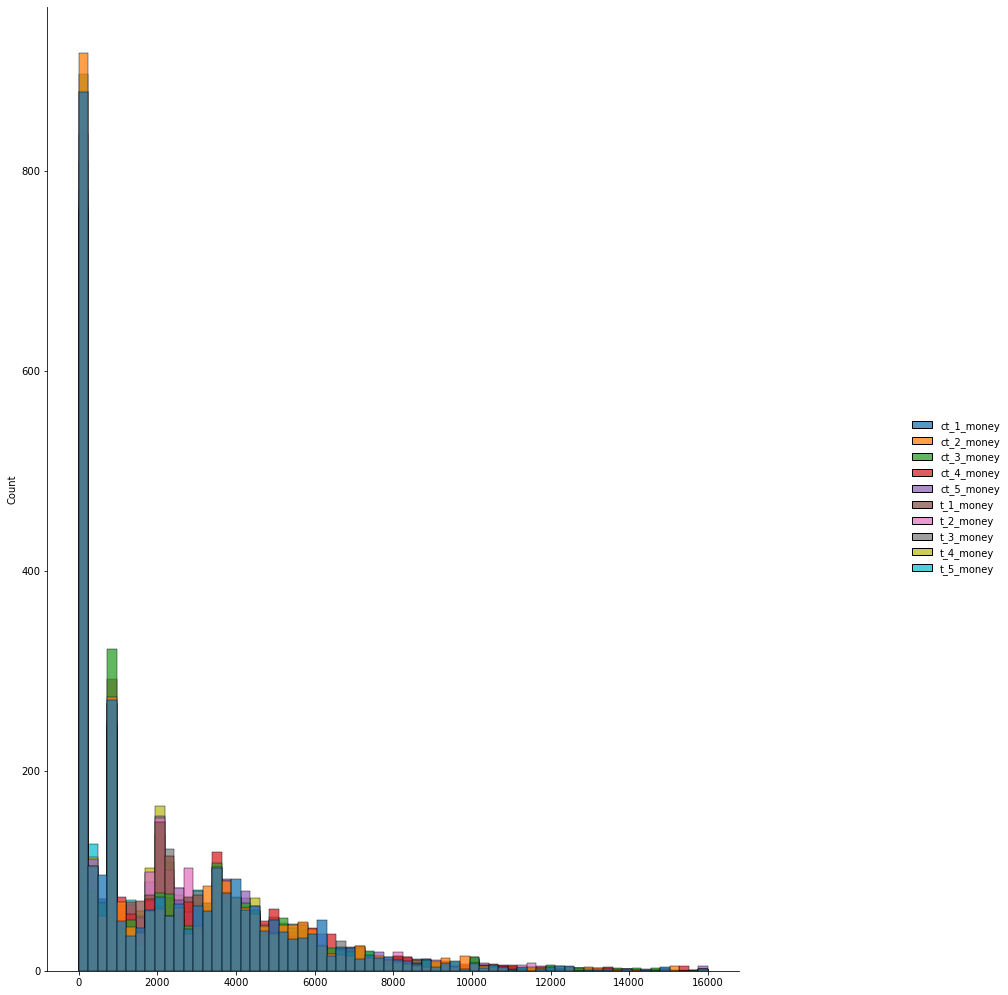

In [52]:
ctmoney = money_temp[money_temp["winner"] == "CT"]
ctmoney = ctmoney.drop("winner", axis=1)

plt.figure(figsize=(30, 10))
ctmoneygr = sns.displot(ctmoney)
ctmoneygr.fig.set_size_inches(15,15)

<Figure size 4320x720 with 0 Axes>

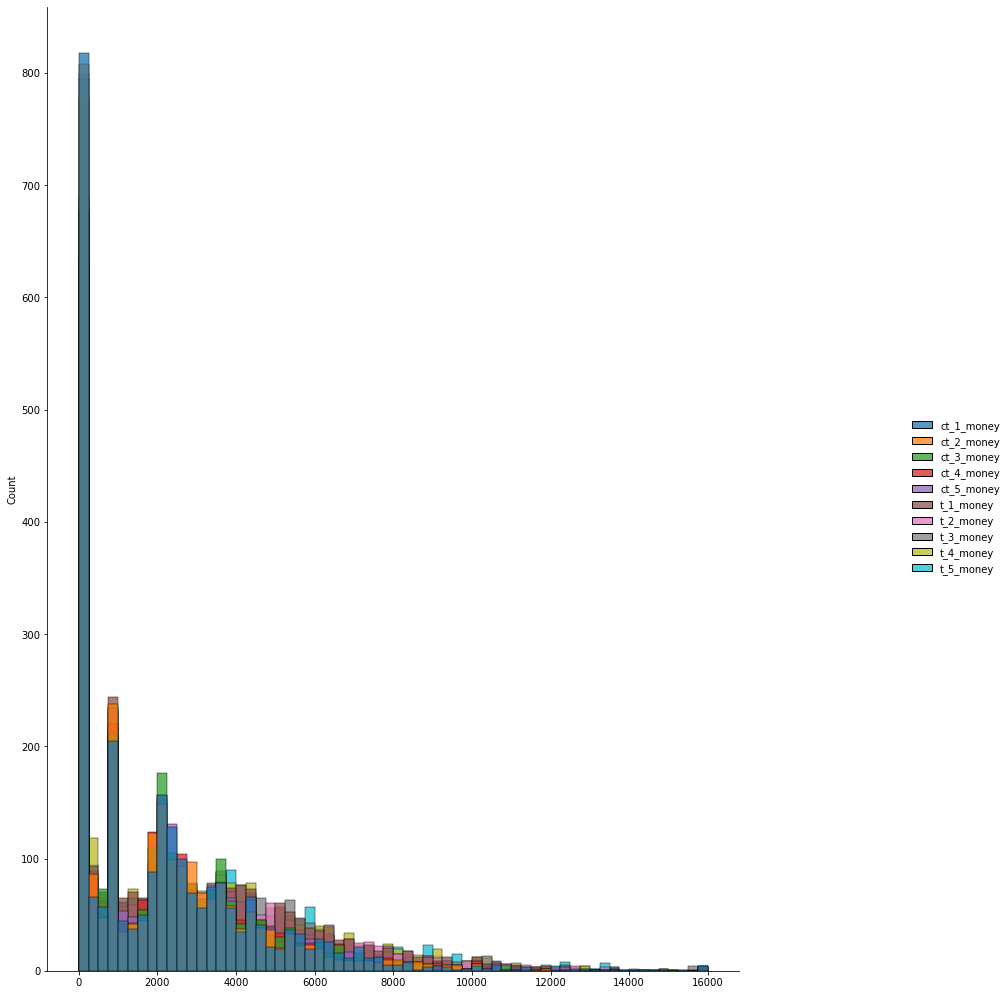

In [53]:
tmoney = money_temp[money_temp["winner"] == "Terrorist"]
tmoney = tmoney.drop("winner", axis=1)

plt.figure(figsize=(60, 10))
tmoneygr = sns.displot(money_temp[money_temp["winner"] == "Terrorist"])
tmoneygr.fig.set_size_inches(15,15)

yang paling terlihat ada perbedaan adalah ct_2_money, ct_3_money, dan persebaran t_1_money

In [54]:
train_data["ct_2_money"] = train["ct_2_money"].fillna(1)
train_data["t_1_money"] = train["t_1_money"].fillna(1)
train_data["ct_3_money"] = train["ct_3_money"].fillna(1)

test["ct_2_money"] = test["ct_2_money"].fillna(1)
test["t_1_money"] = test["t_1_money"].fillna(1)
test["ct_3_money"] = test["ct_3_money"].fillna(1)

In [55]:
train_data = convertcolumn(train_data, ['ct_2_money'])
train_data = convertcolumn(train_data, ['t_1_money'])
train_data = convertcolumn(train_data, ['ct_3_money'])

test = convertcolumn(test, ['ct_2_money'])
test = convertcolumn(test, ['t_1_money'])
test = convertcolumn(test, ['ct_3_money'])

<Figure size 4320x720 with 0 Axes>

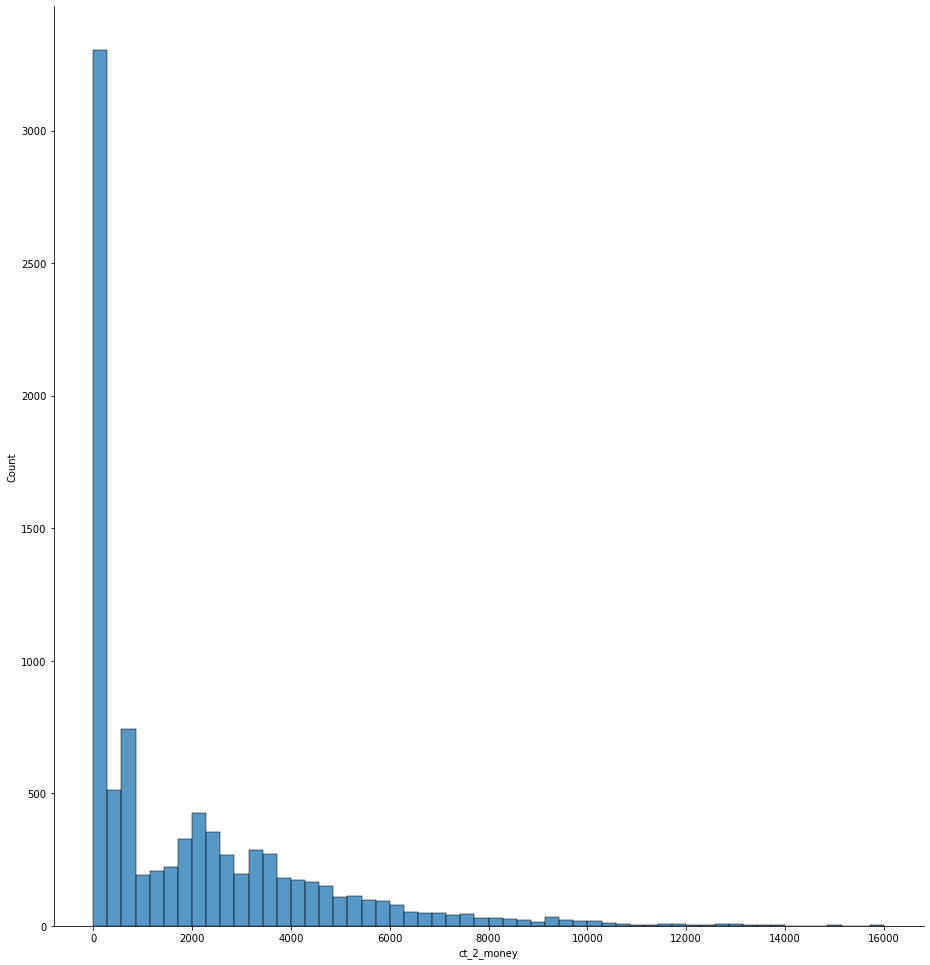

In [56]:
plt.figure(figsize=(60, 10))
sns.displot(train_data.ct_2_money).fig.set_size_inches(15,15)

In [57]:
train_data.ct_2_money.describe()

count     9000.000000
mean      1946.166556
std       2384.804428
min          0.000000
25%        100.000000
50%        800.000000
75%       3100.000000
max      16000.000000
Name: ct_2_money, dtype: float64

In [58]:
train_data[['ct_2_money', 'ct_3_money', 't_1_money']] = train_data[['ct_2_money', 'ct_3_money', 't_1_money']].fillna(1)
test['ct_2_money'] = test['ct_2_money'].fillna(1)

In [59]:
ctmoneydrop = ["ct_1_money", "ct_4_money", "ct_5_money", "t_2_money", "t_3_money", "t_4_money", "t_5_money"]

test = test.drop(ctmoneydrop, axis=1)

# Weapons

## Weapon yang digunakan CT saat CT menang

In [60]:
# Python program to count the frequency of 
# elements in a list using a dictionary
  
def CountFrequency(my_list):
  
    # Creating an empty dictionary 
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
  
    return freq

In [61]:
ct_weapons = pd.DataFrame()
ct_weapons['winner'], ct_weapons["ct_1_weapons"], ct_weapons["ct_2_weapons"], ct_weapons["ct_3_weapons"], ct_weapons["ct_4_weapons"], ct_weapons["ct_5_weapons"] = train["round_winner"], train["ct_1_weapons"], train["ct_2_weapons"], train["ct_3_weapons"], train["ct_4_weapons"], train["ct_5_weapons"]
ct_weapons = ct_weapons.dropna(how = "any")
ct_weapons = ct_weapons[ct_weapons["winner"] == "CT"]
ct_weapons = ct_weapons.drop("winner", axis=1)

list_of_ct_weapons = []

for column in ct_weapons.columns :
    for i in ct_weapons.get(column) :
        splitted_ct = i.split(",")
        list_of_ct_weapons.extend(splitted_ct)

print("Weapons yang digunakan oleh CT saat menang :")
ctwpwin = CountFrequency(list_of_ct_weapons)

Weapons yang digunakan oleh CT saat menang :


<BarContainer object of 34 artists>

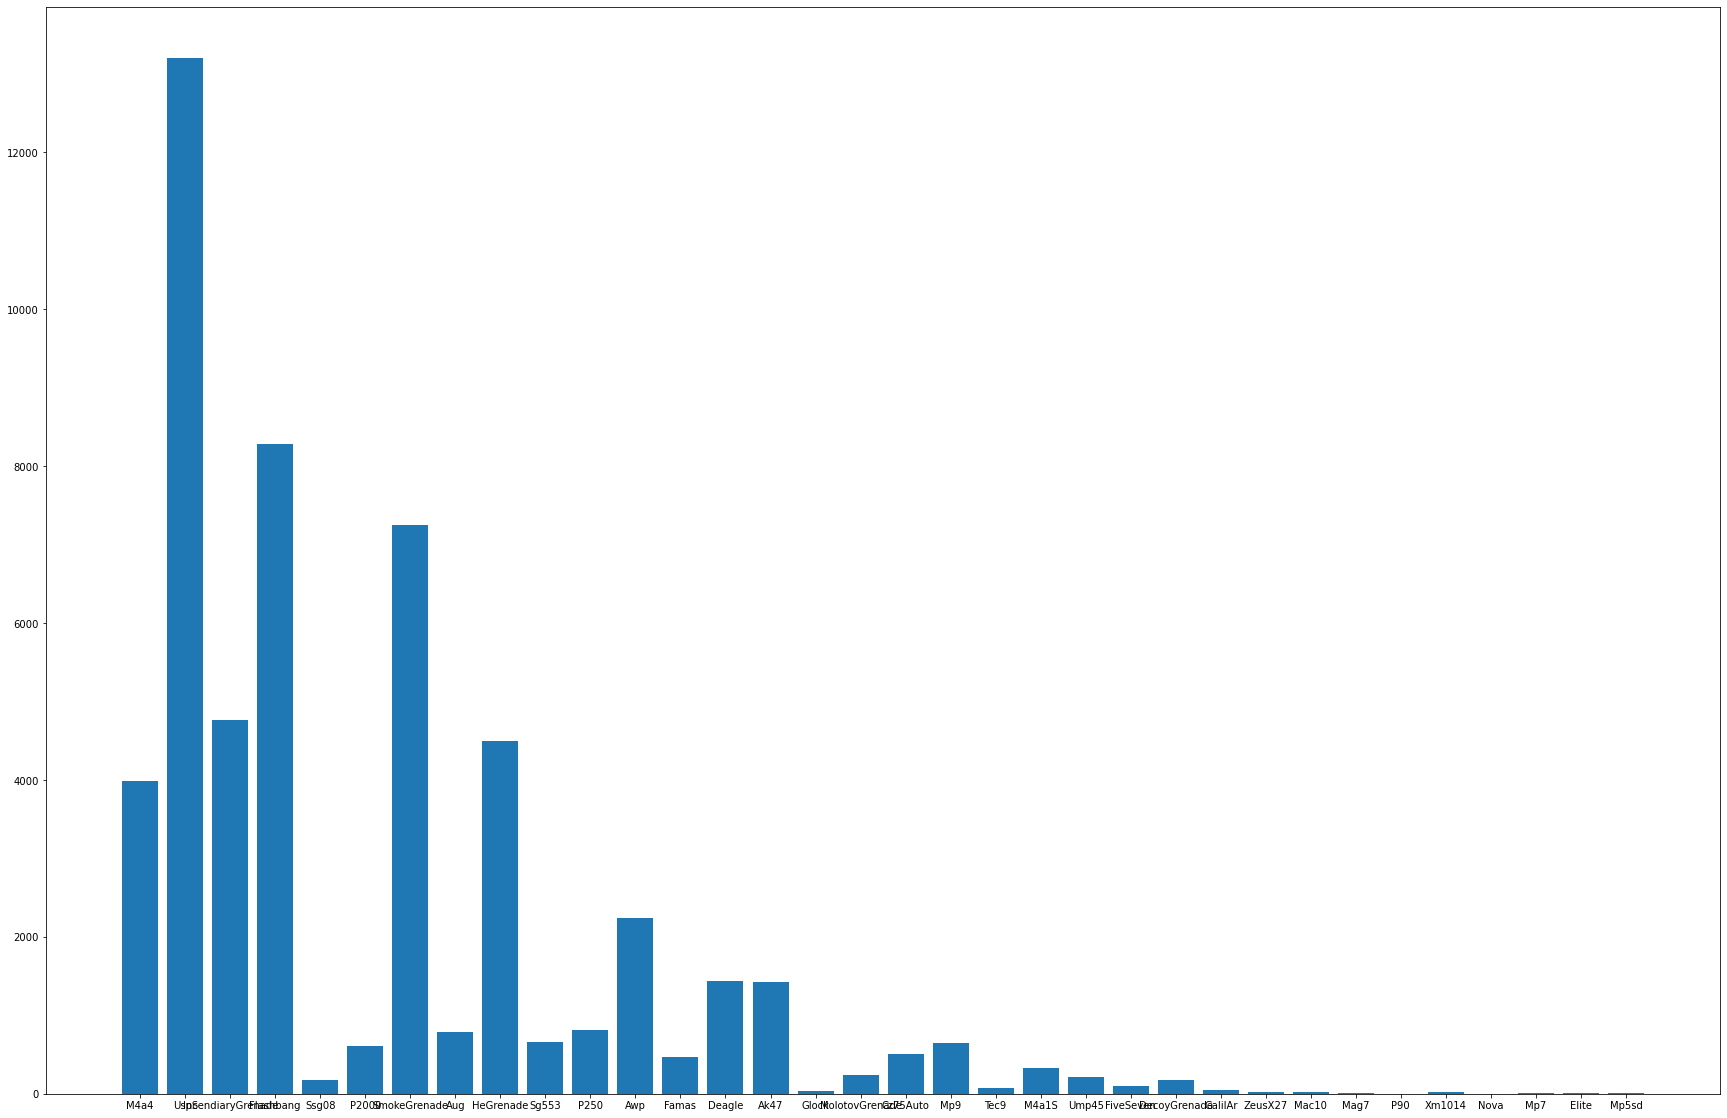

In [62]:
keys = ctwpwin.keys()
values = ctwpwin.values()

plt.figure(figsize=(30, 20))
plt.bar(keys, values)

In [63]:
ct_lose = pd.DataFrame()
ct_lose['winner'], ct_lose["ct_1_weapons"], ct_lose["ct_2_weapons"], ct_lose["ct_3_weapons"], ct_lose["ct_4_weapons"], ct_lose["ct_5_weapons"] = train["round_winner"], train["ct_1_weapons"], train["ct_2_weapons"], train["ct_3_weapons"], train["ct_4_weapons"], train["ct_5_weapons"]
ct_lose = ct_lose.dropna(how = "any")
ct_lose = ct_lose[ct_lose["winner"] == "Terrorist"]
ct_lose = ct_lose.drop("winner", axis=1)

list_of_ct_lose = []

for column in ct_lose.columns :
    for a in ct_lose.get(column) :
        splitted_ctlose = a.split(",")
        list_of_ct_lose.extend(splitted_ctlose)

print("Weapons yang digunakan oleh CT saat kalah :")
ctwplose = CountFrequency(list_of_ct_lose)

Weapons yang digunakan oleh CT saat kalah :


<BarContainer object of 35 artists>

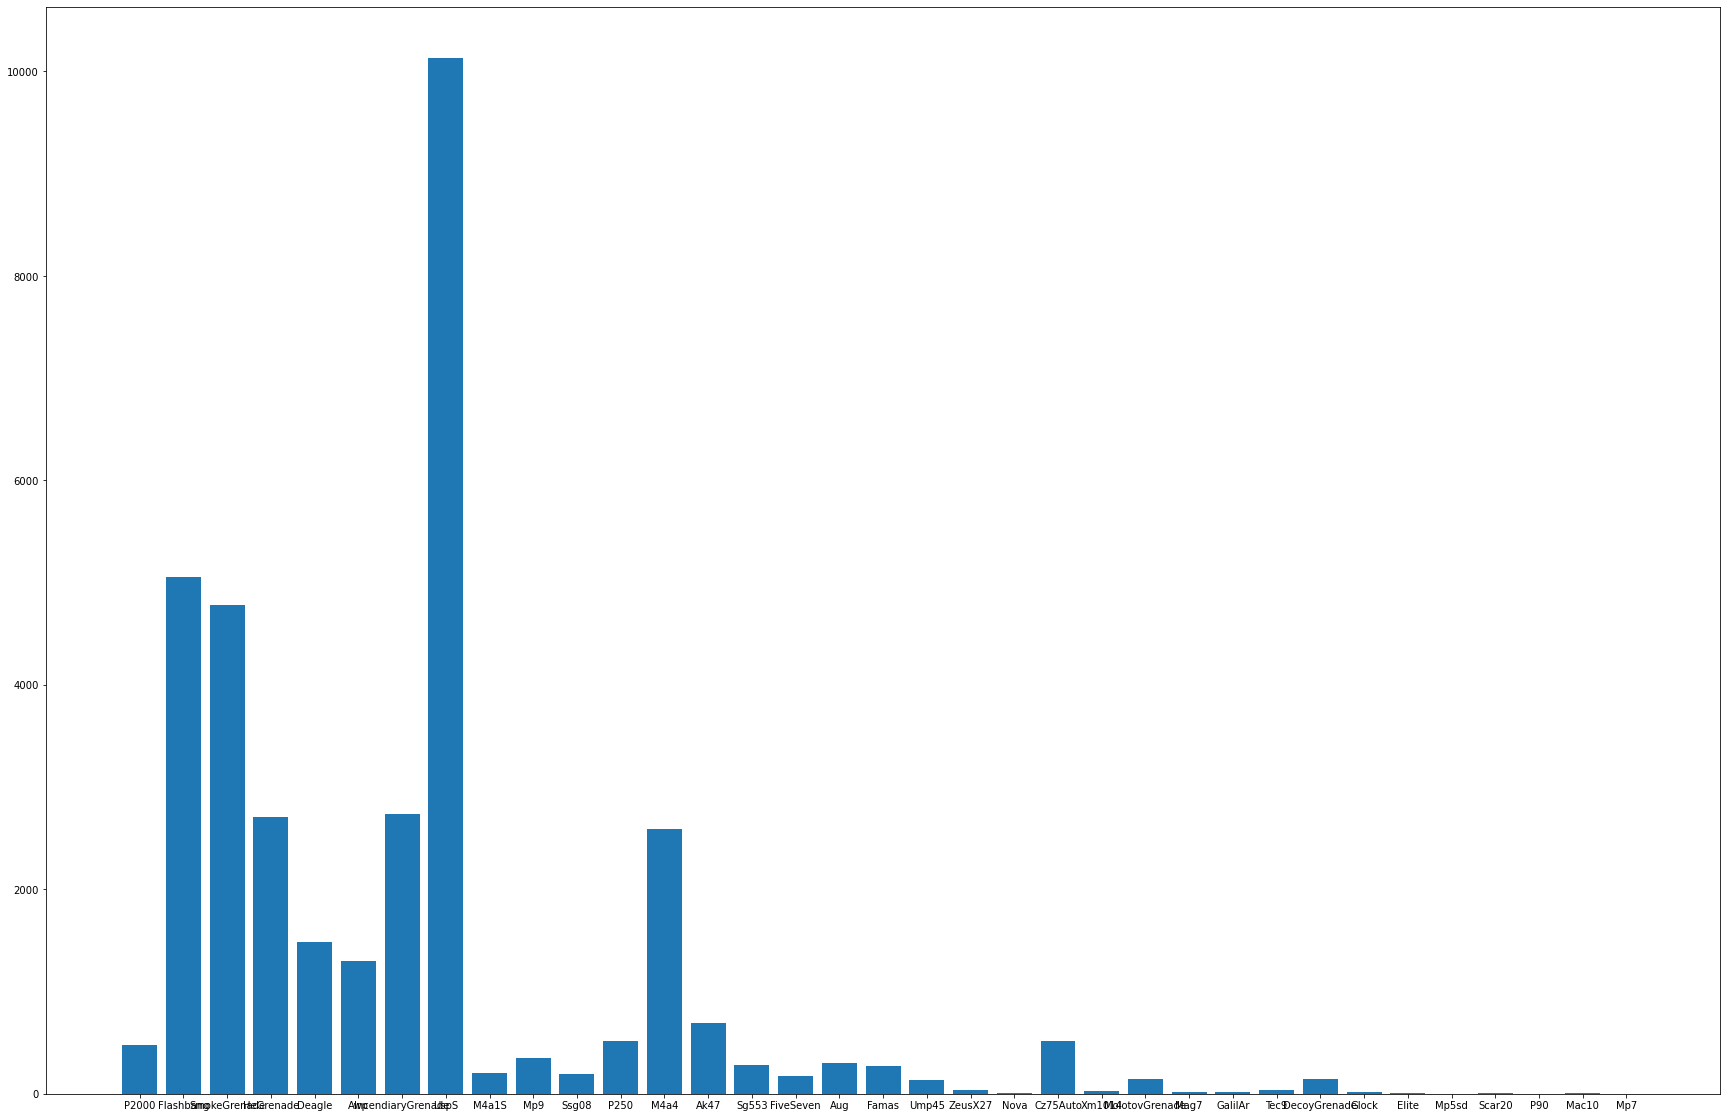

In [64]:
keys = ctwplose.keys()
values = ctwplose.values()

plt.figure(figsize=(30, 20))
plt.bar(keys, values)

### Analisa Weapons Terrorist

### Terrorist menang

In [65]:
t_weapons = pd.DataFrame()
t_weapons['winner'], t_weapons["t_1_weapons"], t_weapons["t_2_weapons"], ct_weapons["t_3_weapons"], ct_weapons["t_4_weapons"], ct_weapons["t_5_weapons"] = train["round_winner"], train["t_1_weapons"], train["t_2_weapons"], train["t_3_weapons"], train["t_4_weapons"], train["t_5_weapons"]
t_weapons = t_weapons.dropna(how = "any")
t_weapons = t_weapons[t_weapons["winner"] == "Terrorist"]
t_weapons = t_weapons.drop("winner", axis=1)

list_of_t_weapons = []

for column in t_weapons.columns :
    for j in t_weapons.get(column) :
        splitted_t = j.split(",")
        list_of_t_weapons.extend(splitted_t)

print("Weapons yang digunakan oleh Terrorist saat menang :")
twpdict = CountFrequency(list_of_t_weapons)

twpdict

Weapons yang digunakan oleh Terrorist saat menang :


{'P250': 660,
 'Awp': 841,
 'SmokeGrenade': 3726,
 'MolotovGrenade': 2924,
 'Flashbang': 4185,
 'Glock': 6745,
 'Ak47': 3615,
 'C4': 1455,
 'Sg553': 1167,
 'Cz75Auto': 169,
 'Deagle': 751,
 'Mac10': 214,
 'M4a4': 173,
 'IncendiaryGrenade': 75,
 'UspS': 369,
 'HeGrenade': 1108,
 'Tec9': 152,
 'GalilAr': 329,
 'Famas': 17,
 'Ump45': 72,
 'DecoyGrenade': 97,
 'Aug': 28,
 'Ssg08': 44,
 'Mp5sd': 14,
 'M4a1S': 15,
 'Mp9': 18,
 'P2000': 9,
 'FiveSeven': 11,
 'ZeusX27': 4,
 'Mp7': 1,
 'Mag7': 1,
 'Xm1014': 1,
 'Elite': 1}

<BarContainer object of 33 artists>

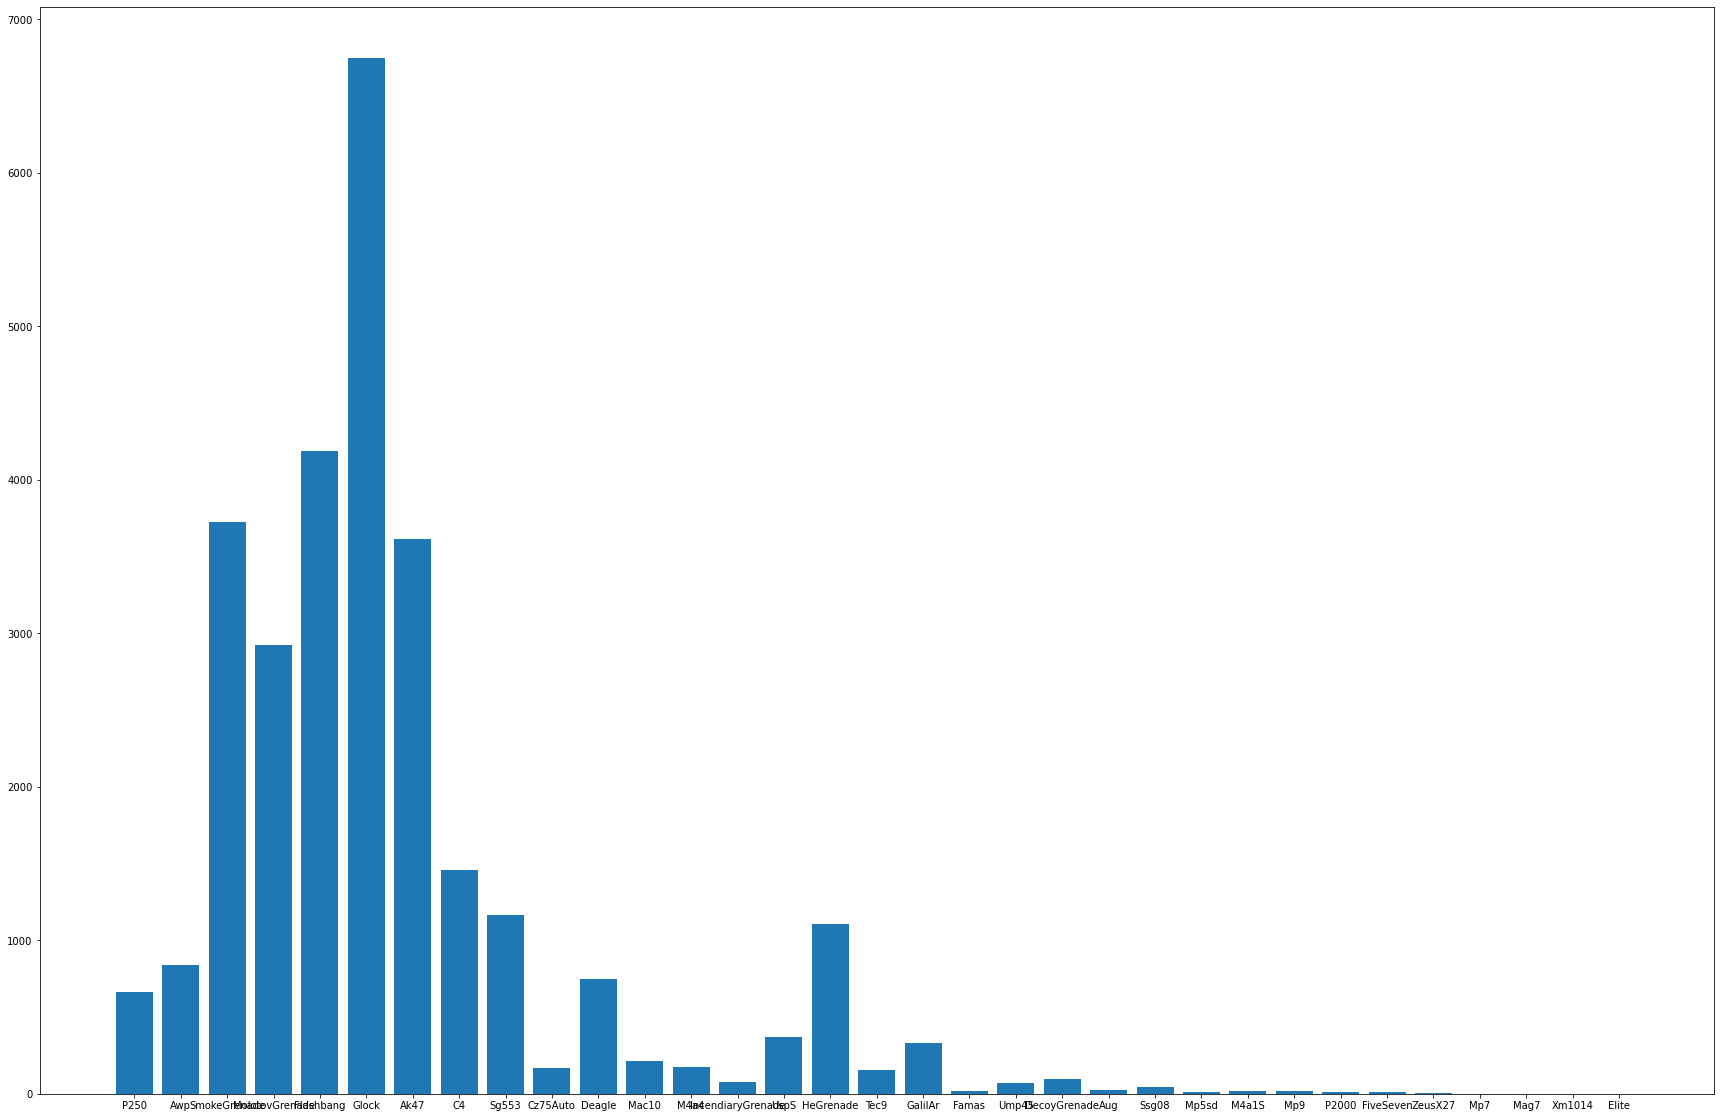

In [66]:
keys = twpdict.keys()
values = twpdict.values()

plt.figure(figsize=(30, 20))
plt.bar(keys, values)

### Terrorist kalah

In [67]:
t_lose = pd.DataFrame()
t_lose['winner'], t_lose["t_1_weapons"], t_lose["t_2_weapons"], ct_lose["t_3_weapons"], ct_lose["t_4_weapons"], ct_lose["t_5_weapons"] = train["round_winner"], train["t_1_weapons"], train["t_2_weapons"], train["t_3_weapons"], train["t_4_weapons"], train["t_5_weapons"]
t_lose = t_lose.dropna(how = "any")
t_lose = t_lose[t_lose["winner"] == "CT"]
t_lose = t_lose.drop("winner", axis=1)

list_of_t_lose = []

for column in t_lose.columns :
    for b in t_lose.get(column) :
        splitted_tlose = b.split(",")
        list_of_t_lose.extend(splitted_tlose)

print("Weapons yang digunakan oleh Terrorist saat kalah :")
tlosewp = CountFrequency(list_of_t_lose)

Weapons yang digunakan oleh Terrorist saat kalah :


<BarContainer object of 31 artists>

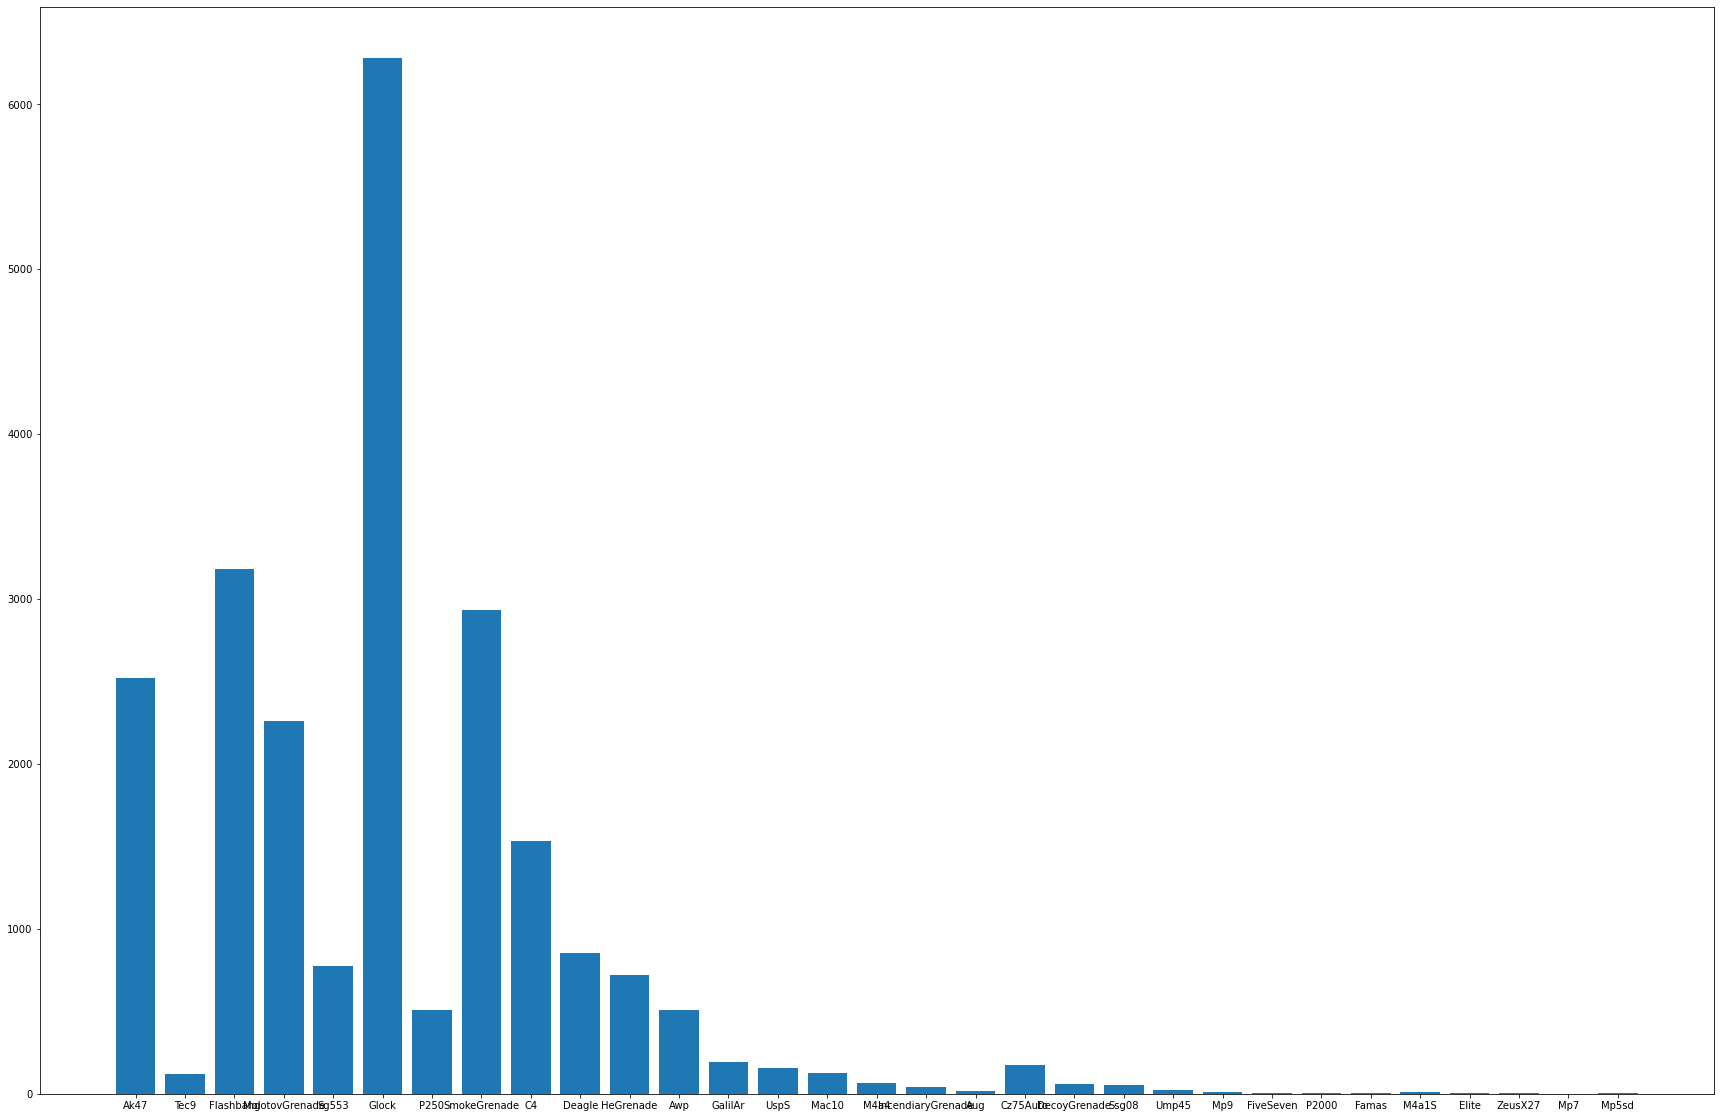

In [68]:
keys = tlosewp.keys()
values = tlosewp.values()

plt.figure(figsize=(30, 20))
plt.bar(keys, values)

# Map

In [69]:
train["map"].isna().value_counts()

False    9000
Name: map, dtype: int64

In [70]:
train[train["round_winner"] == "CT"]["map"].value_counts()

de_nuke        1003
de_dust2        871
de_mirage       752
de_inferno      733
de_train        621
de_vertigo      291
de_overpass     225
Name: map, dtype: int64

In [71]:
train[train["round_winner"] == "Terrorist"]["map"].value_counts()

de_inferno     924
de_dust2       875
de_nuke        864
de_mirage      723
de_train       502
de_vertigo     343
de_overpass    273
Name: map, dtype: int64

Kita lihat bahwa perbedaan terletak pada dimana terrorist cenderung menang di map inferno, sedangkan CT cenderung menang saat di nuke, sedangkan yang lain tidak jauh beda. Maka kita akan lakukan mapping

In [72]:
train_data["map"] = train["map"]

map_mapping = {'de_nuke': 0, 'de_inferno': 1, 'de_mirage': 2,'de_train' : 2,'de_vertigo': 2, 'de_overpass': 2, 'de_dust2': 2}

#for p in train_data:
train_data["map"] = train_data["map"].map(map_mapping)
test["map"] = test["map"].map(map_mapping)
    
train_data

,round_winner,ct_armor,t_armor,ct_4_has_defuser,t_1_has_helmet,ct_3_has_helmet,ct_4_has_helmet,t_2_has_helmet,ct_2_money,t_1_money,ct_3_money,map
0,0,100.0,100.0,0.0,1,0,0,1,50,1350,0,2
1,0,100.0,50.0,1.0,1,1,1,0,0,0,300,2
2,0,0.0,0.0,0.0,0,0,0,0,2650,3550,1500,2
3,0,100.0,96.5,0.0,0,0,1,0,2200,2000,350,0
4,0,50.0,50.0,0.0,0,0,0,0,150,150,150,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1,50.0,89.0,NaN,1,0,1,1,0,5950,100,2
8996,1,100.0,94.5,1.0,1,0,0,1,250,50,100,0
8997,1,100.0,87.0,0.0,1,0,0,1,0,3400,1600,1
8998,1,100.0,99.0,0.0,1,0,0,1,1950,1700,2300,2


Dictionary :
0 : de_nuke
1 : de_inferno
2 : others

<AxesSubplot:>

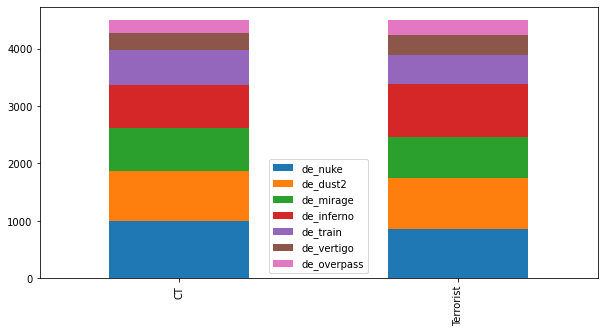

In [73]:
ct = train[train['round_winner']=="CT"]["map"].value_counts()
terrorist = train[train['round_winner']=="Terrorist"]["map"].value_counts()
df = pd.DataFrame([ct, terrorist])
df.index = ['CT','Terrorist']
df.plot(kind='bar',stacked=True, figsize=(10,5))

# Coordinates

# CT Coordinates

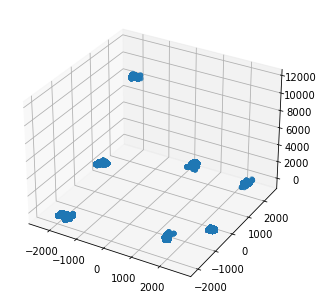

In [74]:
fig = plt.figure()
ax = Axes3D(fig)

ct_x_coor = ["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]
ct_y_coor = ["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]
ct_z_coor = ["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]

ctcoor = train[train["round_winner"] == "CT"][ct_x_coor + ct_y_coor + ct_z_coor].dropna(how = "any")
convertcolumn(ctcoor, ct_x_coor + ct_y_coor + ct_z_coor)

sequence_containing_x_vals = ctcoor[ct_x_coor]
sequence_containing_y_vals = ctcoor[ct_y_coor]
sequence_containing_z_vals = ctcoor[ct_z_coor]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

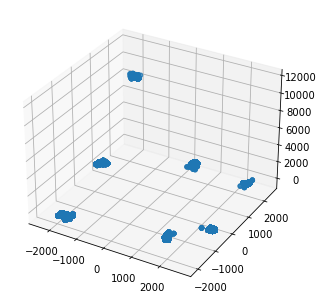

In [75]:
fig = plt.figure()
ax = Axes3D(fig)

ct_x_coor = ["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]
ct_y_coor = ["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]
ct_z_coor = ["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]

tcoor = train[train["round_winner"] == "Terrorist"][ct_x_coor + ct_y_coor + ct_z_coor].dropna(how = "any")
convertcolumn(tcoor, ct_x_coor + ct_y_coor + ct_z_coor)

sequence_containing_x_vals = tcoor[ct_x_coor]
sequence_containing_y_vals = tcoor[ct_y_coor]
sequence_containing_z_vals = tcoor[ct_z_coor]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

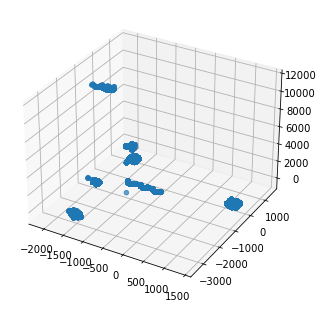

In [76]:
fig = plt.figure()
ax = Axes3D(fig)

t_x_coor = ["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]
t_y_coor = ["t_1_y", "t_2_y", "t_3_y", "t_4_y", "t_5_y"]
t_z_coor = ["t_1_z", "t_2_z", "t_3_z", "t_4_z", "t_5_z"]

ctcoor1 = train[train["round_winner"] == "CT"][t_x_coor + t_y_coor + t_z_coor].dropna(how = "any")
convertcolumn(ctcoor1, t_x_coor + t_y_coor + t_z_coor)

sequence_containing_x_vals = ctcoor1[t_x_coor]
sequence_containing_y_vals = ctcoor1[t_y_coor]
sequence_containing_z_vals = ctcoor1[t_z_coor]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

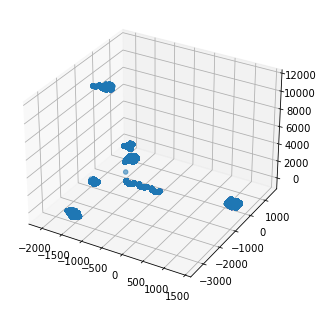

In [77]:
fig = plt.figure()
ax = Axes3D(fig)

t_x_coor = ["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]
t_y_coor = ["t_1_y", "t_2_y", "t_3_y", "t_4_y", "t_5_y"]
t_z_coor = ["t_1_z", "t_2_z", "t_3_z", "t_4_z", "t_5_z"]

ctcoor1 = train[train["round_winner"] == "Terrorist"][t_x_coor + t_y_coor + t_z_coor].dropna(how = "any")
convertcolumn(ctcoor1, t_x_coor + t_y_coor + t_z_coor)

sequence_containing_x_vals = ctcoor1[t_x_coor]
sequence_containing_y_vals = ctcoor1[t_y_coor]
sequence_containing_z_vals = ctcoor1[t_z_coor]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

<AxesSubplot:>

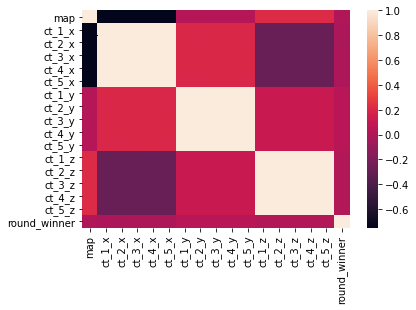

In [78]:
map_coordinates = ["map", "ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x", "ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y", "ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z", "round_winner"]
ct_corr_map = pd.DataFrame()
ct_corr_map[map_coordinates] = train[map_coordinates]
ct_corr_map["map"] = ct_corr_map["map"].map({'de_nuke': 0, 'de_inferno': 1, 'de_mirage': 2,'de_train' : 2,'de_vertigo': 2, 'de_overpass': 2, 'de_dust2': 2})
ct_corr_map["round_winner"] = ct_corr_map["round_winner"].map({'CT' : 0, 'Terrorist' : 1})
ct_corr_map = ct_corr_map.dropna(how="any")
convertcolumn(ct_corr_map, map_coordinates)

sns.heatmap(ct_corr_map.corr())

In [79]:
ct_corr_map[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]].describe()

,ct_1_z,ct_2_z,ct_3_z,ct_4_z,ct_5_z
count,6048.000000,6048.000000,6048.000000,6048.000000,6048.000000
mean,671.486938,671.296296,671.302414,671.272817,671.373512
std,3018.562658,3018.623398,3018.626975,3018.627696,3018.607498
min,-355.000000,-355.000000,-355.000000,-355.000000,-355.000000
25%,-320.000000,-320.000000,-320.000000,-320.000000,-320.000000
50%,-263.000000,-263.000000,-263.000000,-263.000000,-263.000000
75%,127.000000,128.000000,127.000000,127.000000,127.000000
max,11776.000000,11776.000000,11776.000000,11776.000000,11776.000000


In [80]:
train_data[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]] = train[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]]
testfill = test[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]].fillna(test[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]].mode()).mean(axis=1)
train_data = train_data.fillna(1)
trainfill = train_data[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]].mean(axis=1)

In [81]:
train_data[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]] = train_data[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]].replace(0, trainfill)
test[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]] = test[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]].fillna(1)

convertcolumn(test, ["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"])
convertcolumn(train_data, ["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"])

train_data["ct_x_mean"] = train_data[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]].mean(axis=1)
test["ct_x_mean"] = test[["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]].mean(axis=1)
train_data = train_data.drop(["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"], axis = 1)
test = test.drop(["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"], axis=1)

In [82]:
train_data[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]] = train[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]]
testfill = test[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]].dropna(how="any").mean(axis=1)
train_data = train_data.fillna(1)
trainfill = train_data[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]].mean(axis=1)

In [83]:
train_data[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]] = train_data[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]].replace(0, trainfill)
test[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]] = test[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]].fillna(1)

convertcolumn(test, ["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"])
convertcolumn(train_data, ["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"])

train_data["ct_y_mean"] = train_data[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]].mean(axis=1)
test["ct_y_mean"] = test[["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]].mean(axis=1)
train_data = train_data.drop(["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"], axis = 1)
test = test.drop(["ct_1_y", "ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"], axis=1)

In [84]:
train_data[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]] = train[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]]
testfill = test[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]].dropna(how="any").mean(axis=1)
train_data = train_data.fillna(1)
trainfill = train_data[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]].mean(axis=1)

In [85]:
train_data[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]] = train_data[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]].replace(0, trainfill)
test[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]] = test[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]].fillna(1)

convertcolumn(test, ["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"])
convertcolumn(train_data, ["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"])

train_data["ct_z_mean"] = train_data[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]].mean(axis=1)
test["ct_z_mean"] = test[["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]].mean(axis=1)
train_data = train_data.drop(["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"], axis = 1)
test = test.drop(["ct_1_z", "ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"], axis=1)

<AxesSubplot:>

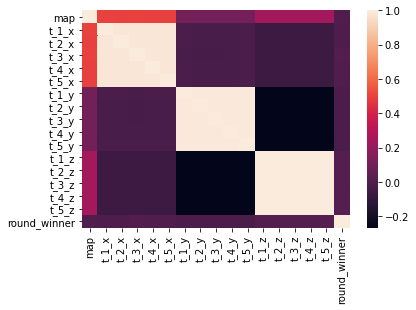

In [86]:
map_coordinates = ["map", "t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x", "t_1_y", "t_2_y", "t_3_y", "t_4_y", "t_5_y", "t_1_z", "t_2_z", "t_3_z", "t_4_z", "t_5_z", "round_winner"]
t_corr_map = pd.DataFrame()
t_corr_map[map_coordinates] = train[map_coordinates]
t_corr_map["map"] = t_corr_map["map"].map({'de_nuke': 0, 'de_inferno': 1, 'de_mirage': 2,'de_train' : 2,'de_vertigo': 2, 'de_overpass': 2, 'de_dust2': 2})
t_corr_map["round_winner"] = t_corr_map["round_winner"].map({'CT' : 0, 'Terrorist' : 1})
t_corr_map = t_corr_map.dropna(how="any")
convertcolumn(t_corr_map, map_coordinates)

sns.heatmap(t_corr_map.corr())

In [87]:
t_corr_map[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]].describe()

,t_1_x,t_2_x,t_3_x,t_4_x,t_5_x
count,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000
mean,-1037.525645,-1043.422568,-1040.330741,-1041.092488,-1047.148081
std,1122.585211,1117.622094,1119.207939,1117.011967,1119.631460
min,-2084.000000,-2084.000000,-2134.000000,-2084.000000,-2084.000000
25%,-1873.000000,-1873.000000,-1873.000000,-1873.000000,-1873.000000
50%,-1530.000000,-1520.000000,-1520.000000,-1520.000000,-1530.000000
75%,-657.000000,-696.000000,-696.000000,-696.000000,-760.000000
max,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000


In [88]:
train_data[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]] = train[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]]
testfill = test[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]].dropna(how="any").mean(axis=1)
train_data = train_data.fillna(1)
trainfill = train_data[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]].mean(axis=1)

In [89]:
train_data[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]] = train_data[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]].replace(0, trainfill)
test[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]] = test[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]].fillna(1)

convertcolumn(test, ["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"])
convertcolumn(train_data, ["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"])

train_data["t_x_mean"] = train_data[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]].mean(axis=1)
test["t_x_mean"] = test[["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]].mean(axis=1)
train_data = train_data.drop(["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"], axis = 1)
test = test.drop(["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"], axis=1)

In [90]:
train_data.isna().sum()

round_winner        0
ct_armor            0
t_armor             0
ct_4_has_defuser    0
t_1_has_helmet      0
ct_3_has_helmet     0
ct_4_has_helmet     0
t_2_has_helmet      0
ct_2_money          0
t_1_money           0
ct_3_money          0
map                 0
ct_x_mean           0
ct_y_mean           0
ct_z_mean           0
t_x_mean            0
dtype: int64

In [91]:
train_data

,round_winner,ct_armor,t_armor,ct_4_has_defuser,t_1_has_helmet,ct_3_has_helmet,ct_4_has_helmet,t_2_has_helmet,ct_2_money,t_1_money,ct_3_money,map,ct_x_mean,ct_y_mean,ct_z_mean,t_x_mean
0,0,100.0,100.0,0.0,1,0,0,1,50,1350,0,2,1624.2,-1395.4,-319.8,-1977.6
1,0,100.0,50.0,1.0,1,1,1,0,0,0,300,2,-1778.0,-1873.2,-269.0,1231.0
2,0,0.0,0.0,0.0,0,0,0,0,2650,3550,1500,2,256.8,2414.6,-120.2,-830.0
3,0,100.0,96.5,0.0,0,0,1,0,2200,2000,350,0,2623.6,-423.6,-352.6,-1500.8
4,0,50.0,50.0,0.0,0,0,0,0,150,150,150,2,257.0,2414.8,-120.0,-761.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1,50.0,89.0,1.0,1,0,1,1,0,5950,100,2,-1065.8,-1117.8,-160.6,1295.4
8996,1,100.0,94.5,1.0,1,0,0,1,250,50,100,0,2567.6,-410.8,-352.6,-1906.0
8997,1,100.0,87.0,0.0,1,0,0,1,0,3400,1600,1,2384.4,2067.0,128.2,-1589.0
8998,1,100.0,99.0,0.0,1,0,0,1,1950,1700,2300,2,257.0,2414.6,-119.8,-665.8


In [92]:
test

,id,map,patch_version,round_status,round_status_time_left,ct_1_has_defuser,ct_1_has_helmet,ct_1_weapons,ct_2_has_defuser,ct_2_has_helmet,...,t_5_has_helmet,t_5_weapons,t_5_y,t_5_z,ct_armor,t_armor,ct_x_mean,ct_y_mean,ct_z_mean,t_x_mean
0,9000,2,13749,FreezeTime,11.80141,False,False,UspS,False,False,...,False,UspS,-754.00524,78.98784,0.0,49.5,257.0,2414.6,-120.2,-775.6
1,9001,2,13694,FreezeTime,19.96663,False,False,UspS,False,False,...,False,Glock,1357.97839,-191.87803,0.0,0.0,1593.0,-1406.4,-319.2,-2003.4
2,9002,0,13740,FreezeTime,17.61698,False,False,P2000,False,False,...,False,Glock,-1025.14593,-416.23268,0.0,50.0,2570.8,-405.8,-353.4,-1862.2
3,9003,2,13751,FreezeTime,11.89672,True,True,"Ak47,P250,HeGrenade,Flashbang,IncendiaryGrenad...",True,True,...,True,"Ak47,Glock,SmokeGrenade,MolotovGrenade,Flashbang",1216.12822,-191.90021,100.0,94.5,1617.0,-1401.0,-319.0,-2017.4
4,9004,2,13753,Normal,54.90399,False,False,"ZeusX27,M4a4,UspS,HeGrenade",False,False,...,NaN,NaN,NaN,NaN,100.0,85.5,655.6,-586.6,-127.2,-1600.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,14995,2,13753,Normal,74.88281,True,True,"Ak47,UspS,HeGrenade,Flashbang",True,True,...,True,"Glock,Ak47,MolotovGrenade,SmokeGrenade,Flashbang",-842.93323,95.26875,85.5,100.0,150.8,1456.8,-71.6,-683.0
5996,14996,1,13703,Normal,75.07208,True,True,"Aug,UspS,SmokeGrenade,HeGrenade,Flashbang",False,False,...,NaN,NaN,NaN,NaN,97.0,79.5,1425.2,1221.6,78.0,-973.6
5997,14997,2,13738,Normal,95.00509,False,True,"Deagle,Famas,HeGrenade",False,True,...,True,"Awp,P250,MolotovGrenade,SmokeGrenade,Flashbang,C4",-843.08167,95.12350,100.0,100.0,220.8,1927.0,-95.8,-832.6
5998,14998,0,13722,Normal,115.12136,True,True,"M4a4,UspS,SmokeGrenade,Flashbang,IncendiaryGre...",True,True,...,False,"Deagle,MolotovGrenade,SmokeGrenade,Flashbang",-979.91803,-417.33316,97.0,100.0,2593.0,-452.0,-352.6,-1862.4


# Round Status

In [93]:
train[train["round_winner"] == "CT"]["round_status"].value_counts()

Normal         2828
FreezeTime     1422
BombPlanted     246
Name: round_status, dtype: int64

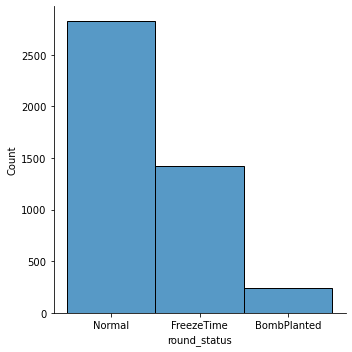

In [94]:
sns.displot(train[train["round_winner"] == "CT"]["round_status"])

In [95]:
train[train["round_winner"] == "Terrorist"]["round_status"].value_counts()

Normal         2503
FreezeTime     1226
BombPlanted     775
Name: round_status, dtype: int64

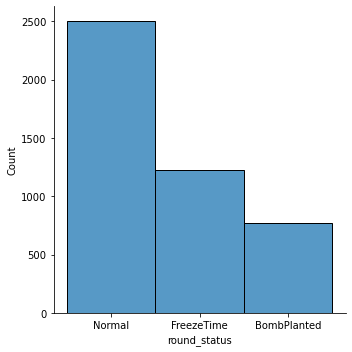

In [96]:
sns.displot(train[train["round_winner"] == "Terrorist"]["round_status"])

Tim Terrorist cenderung lebih sering menang di mode BombPlanted

In [97]:
train_data["round_status"] = train["round_status"]

status_mapping = {'BombPlanted': 1, 'FreezeTime': 0, 'Normal': 0}

#for p in train_data:
train_data["round_status"] = train_data["round_status"].map(status_mapping)
test["round_status"] = test["round_status"].map(status_mapping)
    
train_data

,round_winner,ct_armor,t_armor,ct_4_has_defuser,t_1_has_helmet,ct_3_has_helmet,ct_4_has_helmet,t_2_has_helmet,ct_2_money,t_1_money,ct_3_money,map,ct_x_mean,ct_y_mean,ct_z_mean,t_x_mean,round_status
0,0,100.0,100.0,0.0,1,0,0,1,50,1350,0,2,1624.2,-1395.4,-319.8,-1977.6,0
1,0,100.0,50.0,1.0,1,1,1,0,0,0,300,2,-1778.0,-1873.2,-269.0,1231.0,0
2,0,0.0,0.0,0.0,0,0,0,0,2650,3550,1500,2,256.8,2414.6,-120.2,-830.0,0
3,0,100.0,96.5,0.0,0,0,1,0,2200,2000,350,0,2623.6,-423.6,-352.6,-1500.8,0
4,0,50.0,50.0,0.0,0,0,0,0,150,150,150,2,257.0,2414.8,-120.0,-761.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1,50.0,89.0,1.0,1,0,1,1,0,5950,100,2,-1065.8,-1117.8,-160.6,1295.4,0
8996,1,100.0,94.5,1.0,1,0,0,1,250,50,100,0,2567.6,-410.8,-352.6,-1906.0,0
8997,1,100.0,87.0,0.0,1,0,0,1,0,3400,1600,1,2384.4,2067.0,128.2,-1589.0,0
8998,1,100.0,99.0,0.0,1,0,0,1,1950,1700,2300,2,257.0,2414.6,-119.8,-665.8,0


In [98]:
colsdrop = ['ct_1_has_defuser', 'ct_1_has_helmet', 'ct_2_has_defuser', 'ct_2_has_helmet', 'ct_3_has_defuser','ct_5_has_defuser', 'ct_5_has_helmet', 't_1_has_defuser', 't_2_has_defuser','t_3_has_defuser', 't_3_has_helmet', 't_4_has_defuser','t_4_has_helmet', 't_5_has_defuser', 't_5_has_helmet', 'patch_version', 'round_status_time_left' ,'ct_1_weapons', 'ct_2_weapons', 'ct_3_weapons', 'ct_4_weapons' ,'ct_5_weapons' ,'t_1_weapons' ,'t_2_weapons', 't_3_weapons', 't_4_weapons', 't_5_weapons', 't_1_y', 't_1_z', 't_2_y', 't_2_z', 't_3_y' ,'t_3_z' ,'t_4_y' ,'t_4_z' ,'t_5_y' ,'t_5_z']

test = test.drop(colsdrop, axis=1)

In [99]:
test = test.replace(["True", "False"], [1,0])

In [100]:
test

,id,map,round_status,ct_2_money,ct_3_has_helmet,ct_3_money,ct_4_has_defuser,ct_4_has_helmet,t_1_has_helmet,t_1_money,t_2_has_helmet,ct_armor,t_armor,ct_x_mean,ct_y_mean,ct_z_mean,t_x_mean
0,9000,2,0,2050,0.0,2050,0.0,0.0,0,3850,0.0,0.0,49.5,257.0,2414.6,-120.2,-775.6
1,9001,2,0,800,0.0,800,0.0,0.0,0,800,0.0,0.0,0.0,1593.0,-1406.4,-319.2,-2003.4
2,9002,0,0,800,0.0,0,0.0,0.0,0,0,0.0,0.0,50.0,2570.8,-405.8,-353.4,-1862.2
3,9003,2,0,7200,1.0,11650,1.0,1.0,1,50,1.0,100.0,94.5,1617.0,-1401.0,-319.0,-2017.4
4,9004,2,0,50,NaN,1,NaN,NaN,1,4450,1.0,100.0,85.5,655.6,-586.6,-127.2,-1600.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,14995,2,0,1700,1.0,3150,NaN,NaN,0,150,1.0,85.5,100.0,150.8,1456.8,-71.6,-683.0
5996,14996,1,0,550,0.0,400,NaN,NaN,1,7000,1.0,97.0,79.5,1425.2,1221.6,78.0,-973.6
5997,14997,2,0,300,0.0,100,1.0,0.0,1,4450,1.0,100.0,100.0,220.8,1927.0,-95.8,-832.6
5998,14998,0,0,8600,1.0,7500,1.0,1.0,1,2450,1.0,97.0,100.0,2593.0,-452.0,-352.6,-1862.4


In [101]:
train_data.isna().sum()#value NA dari test

round_winner        0
ct_armor            0
t_armor             0
ct_4_has_defuser    0
t_1_has_helmet      0
ct_3_has_helmet     0
ct_4_has_helmet     0
t_2_has_helmet      0
ct_2_money          0
t_1_money           0
ct_3_money          0
map                 0
ct_x_mean           0
ct_y_mean           0
ct_z_mean           0
t_x_mean            0
round_status        0
dtype: int64

karena yang NA hanya sebagian kecil, dan modus dari column t_1_has_helmet adalah true(1), maka kita akan mengisi kolom NA dengan modus, yaitu true(1)

In [102]:
train_data = train_data.fillna(1)

In [103]:
test.isna().sum()

id                     0
map                    0
round_status           0
ct_2_money             0
ct_3_has_helmet      707
ct_3_money             0
ct_4_has_defuser    1205
ct_4_has_helmet     1205
t_1_has_helmet         0
t_1_money              0
t_2_has_helmet       311
ct_armor               0
t_armor                0
ct_x_mean              0
ct_y_mean              0
ct_z_mean              0
t_x_mean               0
dtype: int64

In [104]:
test = test.fillna(1)

In [105]:
test.isna().sum()

id                  0
map                 0
round_status        0
ct_2_money          0
ct_3_has_helmet     0
ct_3_money          0
ct_4_has_defuser    0
ct_4_has_helmet     0
t_1_has_helmet      0
t_1_money           0
t_2_has_helmet      0
ct_armor            0
t_armor             0
ct_x_mean           0
ct_y_mean           0
ct_z_mean           0
t_x_mean            0
dtype: int64

In [106]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [107]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

In [108]:
features = ['ct_armor', 't_armor', 'ct_4_has_defuser',
       't_1_has_helmet', 'ct_3_has_helmet', 'ct_4_has_helmet',
       't_2_has_helmet', 'ct_2_money', 't_1_money', 'ct_3_money', 'map',
       'ct_x_mean', 'ct_y_mean', 'ct_z_mean', 't_x_mean', 'round_status']
X = train_data[features]
y = train_data["round_winner"]

In [109]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78444444 0.78444444 0.81       0.80444444 0.81333333 0.78111111
 0.80222222 0.79666667 0.79777778 0.79444444]


In [110]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.69

In [111]:
test.describe()

,map,round_status,ct_2_money,ct_3_has_helmet,ct_3_money,ct_4_has_defuser,ct_4_has_helmet,t_1_has_helmet,t_1_money,t_2_has_helmet,ct_armor,t_armor,ct_x_mean,ct_y_mean,ct_z_mean,t_x_mean
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.397500,0.105000,1972.506500,0.537667,1898.067833,0.488167,0.569167,0.641833,2423.708500,0.659500,75.304333,71.430000,684.781000,316.962967,598.824967,-927.714700
std,0.811338,0.306579,2392.792716,0.498621,2434.674836,0.499902,0.495234,0.479501,2671.948946,0.473917,36.164515,37.286813,1574.722229,1473.352872,2705.034617,1011.157426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2343.800000,-1995.400000,-353.600000,-2031.200000
25%,1.000000,0.000000,150.000000,0.000000,100.000000,0.000000,0.000000,0.000000,237.500000,0.000000,50.000000,50.000000,-700.400000,-852.550000,-282.000000,-1633.200000
50%,2.000000,0.000000,900.000000,1.000000,800.000000,0.000000,1.000000,1.000000,1600.000000,1.000000,97.000000,92.500000,635.600000,154.200000,-120.200000,-1271.300000
75%,2.000000,0.000000,3100.000000,1.000000,3000.000000,1.000000,1.000000,1.000000,3750.000000,1.000000,100.000000,100.000000,2384.600000,2037.600000,127.400000,-590.750000
max,2.000000,1.000000,16000.000000,1.000000,16000.000000,1.000000,1.000000,1.000000,16000.000000,1.000000,100.000000,100.000000,2638.400000,2414.800000,11776.000000,1359.400000


In [112]:
test.columns

Index(['id', 'map', 'round_status', 'ct_2_money', 'ct_3_has_helmet',
       'ct_3_money', 'ct_4_has_defuser', 'ct_4_has_helmet', 't_1_has_helmet',
       't_1_money', 't_2_has_helmet', 'ct_armor', 't_armor', 'ct_x_mean',
       'ct_y_mean', 'ct_z_mean', 't_x_mean'],
      dtype='object')

In [113]:
train_data.describe()

,round_winner,ct_armor,t_armor,ct_4_has_defuser,t_1_has_helmet,ct_3_has_helmet,ct_4_has_helmet,t_2_has_helmet,ct_2_money,t_1_money,ct_3_money,map,ct_x_mean,ct_y_mean,ct_z_mean,t_x_mean,round_status
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.00000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.500444,74.851444,71.141944,0.487778,0.644667,0.542667,0.566333,0.658000,1946.166556,2409.711111,1870.539556,1.40100,645.364489,319.108467,592.559156,-898.624644,0.113444
std,0.500028,36.173955,37.662031,0.499878,0.478641,0.498204,0.495608,0.474406,2384.804428,2617.036709,2401.986310,0.80942,1570.192831,1467.888165,2713.392059,1019.465881,0.317153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-2349.200000,-1995.200000,-353.400000,-2031.200000,0.000000
25%,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,250.000000,100.000000,1.00000,-767.500000,-815.400000,-281.600000,-1628.200000,0.000000
50%,1.000000,97.000000,92.500000,0.000000,1.000000,1.000000,1.000000,1.000000,800.000000,1600.000000,800.000000,2.00000,490.600000,156.600000,-120.200000,-1196.700000,0.000000
75%,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3100.000000,3800.000000,3000.000000,2.00000,2380.600000,2037.600000,103.000000,-553.850000,0.000000
max,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16000.000000,16000.000000,16000.000000,2.00000,2638.400000,2415.000000,11776.000000,1359.600000,1.000000


In [114]:
train_data.columns

Index(['round_winner', 'ct_armor', 't_armor', 'ct_4_has_defuser',
       't_1_has_helmet', 'ct_3_has_helmet', 'ct_4_has_helmet',
       't_2_has_helmet', 'ct_2_money', 't_1_money', 'ct_3_money', 'map',
       'ct_x_mean', 'ct_y_mean', 'ct_z_mean', 't_x_mean', 'round_status'],
      dtype='object')

In [115]:
test["ct_3_has_helmet"] = test['ct_3_has_helmet'].replace(100, 1)
test["ct_4_has_helmet"] = test['ct_4_has_helmet'].replace(100, 1)

In [116]:
clf = RandomForestClassifier()
clf.fit(X, y)

testcols = ['id', 'ct_armor', 't_armor', 'ct_4_has_defuser',
       't_1_has_helmet', 'ct_3_has_helmet', 'ct_4_has_helmet',
       't_2_has_helmet', 'ct_2_money', 't_1_money', 'ct_3_money', 'map',
       'ct_x_mean', 'ct_y_mean', 'ct_z_mean', 't_x_mean', 'round_status']
test_data = pd.DataFrame()
test_data[testcols] = test[testcols]
test_data = test_data.drop("id", axis=1)
prediction = clf.predict(test_data)

prediction

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [117]:
submissioncsv = pd.DataFrame({
        "id": test["id"],
        "round_winner": prediction
    })

submissioncsv["round_winner"] = submissioncsv["round_winner"].replace([0,1], ["CT", "Terrorist"])

In [118]:
submissioncsv.to_csv('submission.csv', index = False)